# ImageNet model visualizations

In [ ]:
# load data
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

with open("../results/ImageNet_results_test.json", "r") as f:
    results = json.load(f)

StopIteration: 

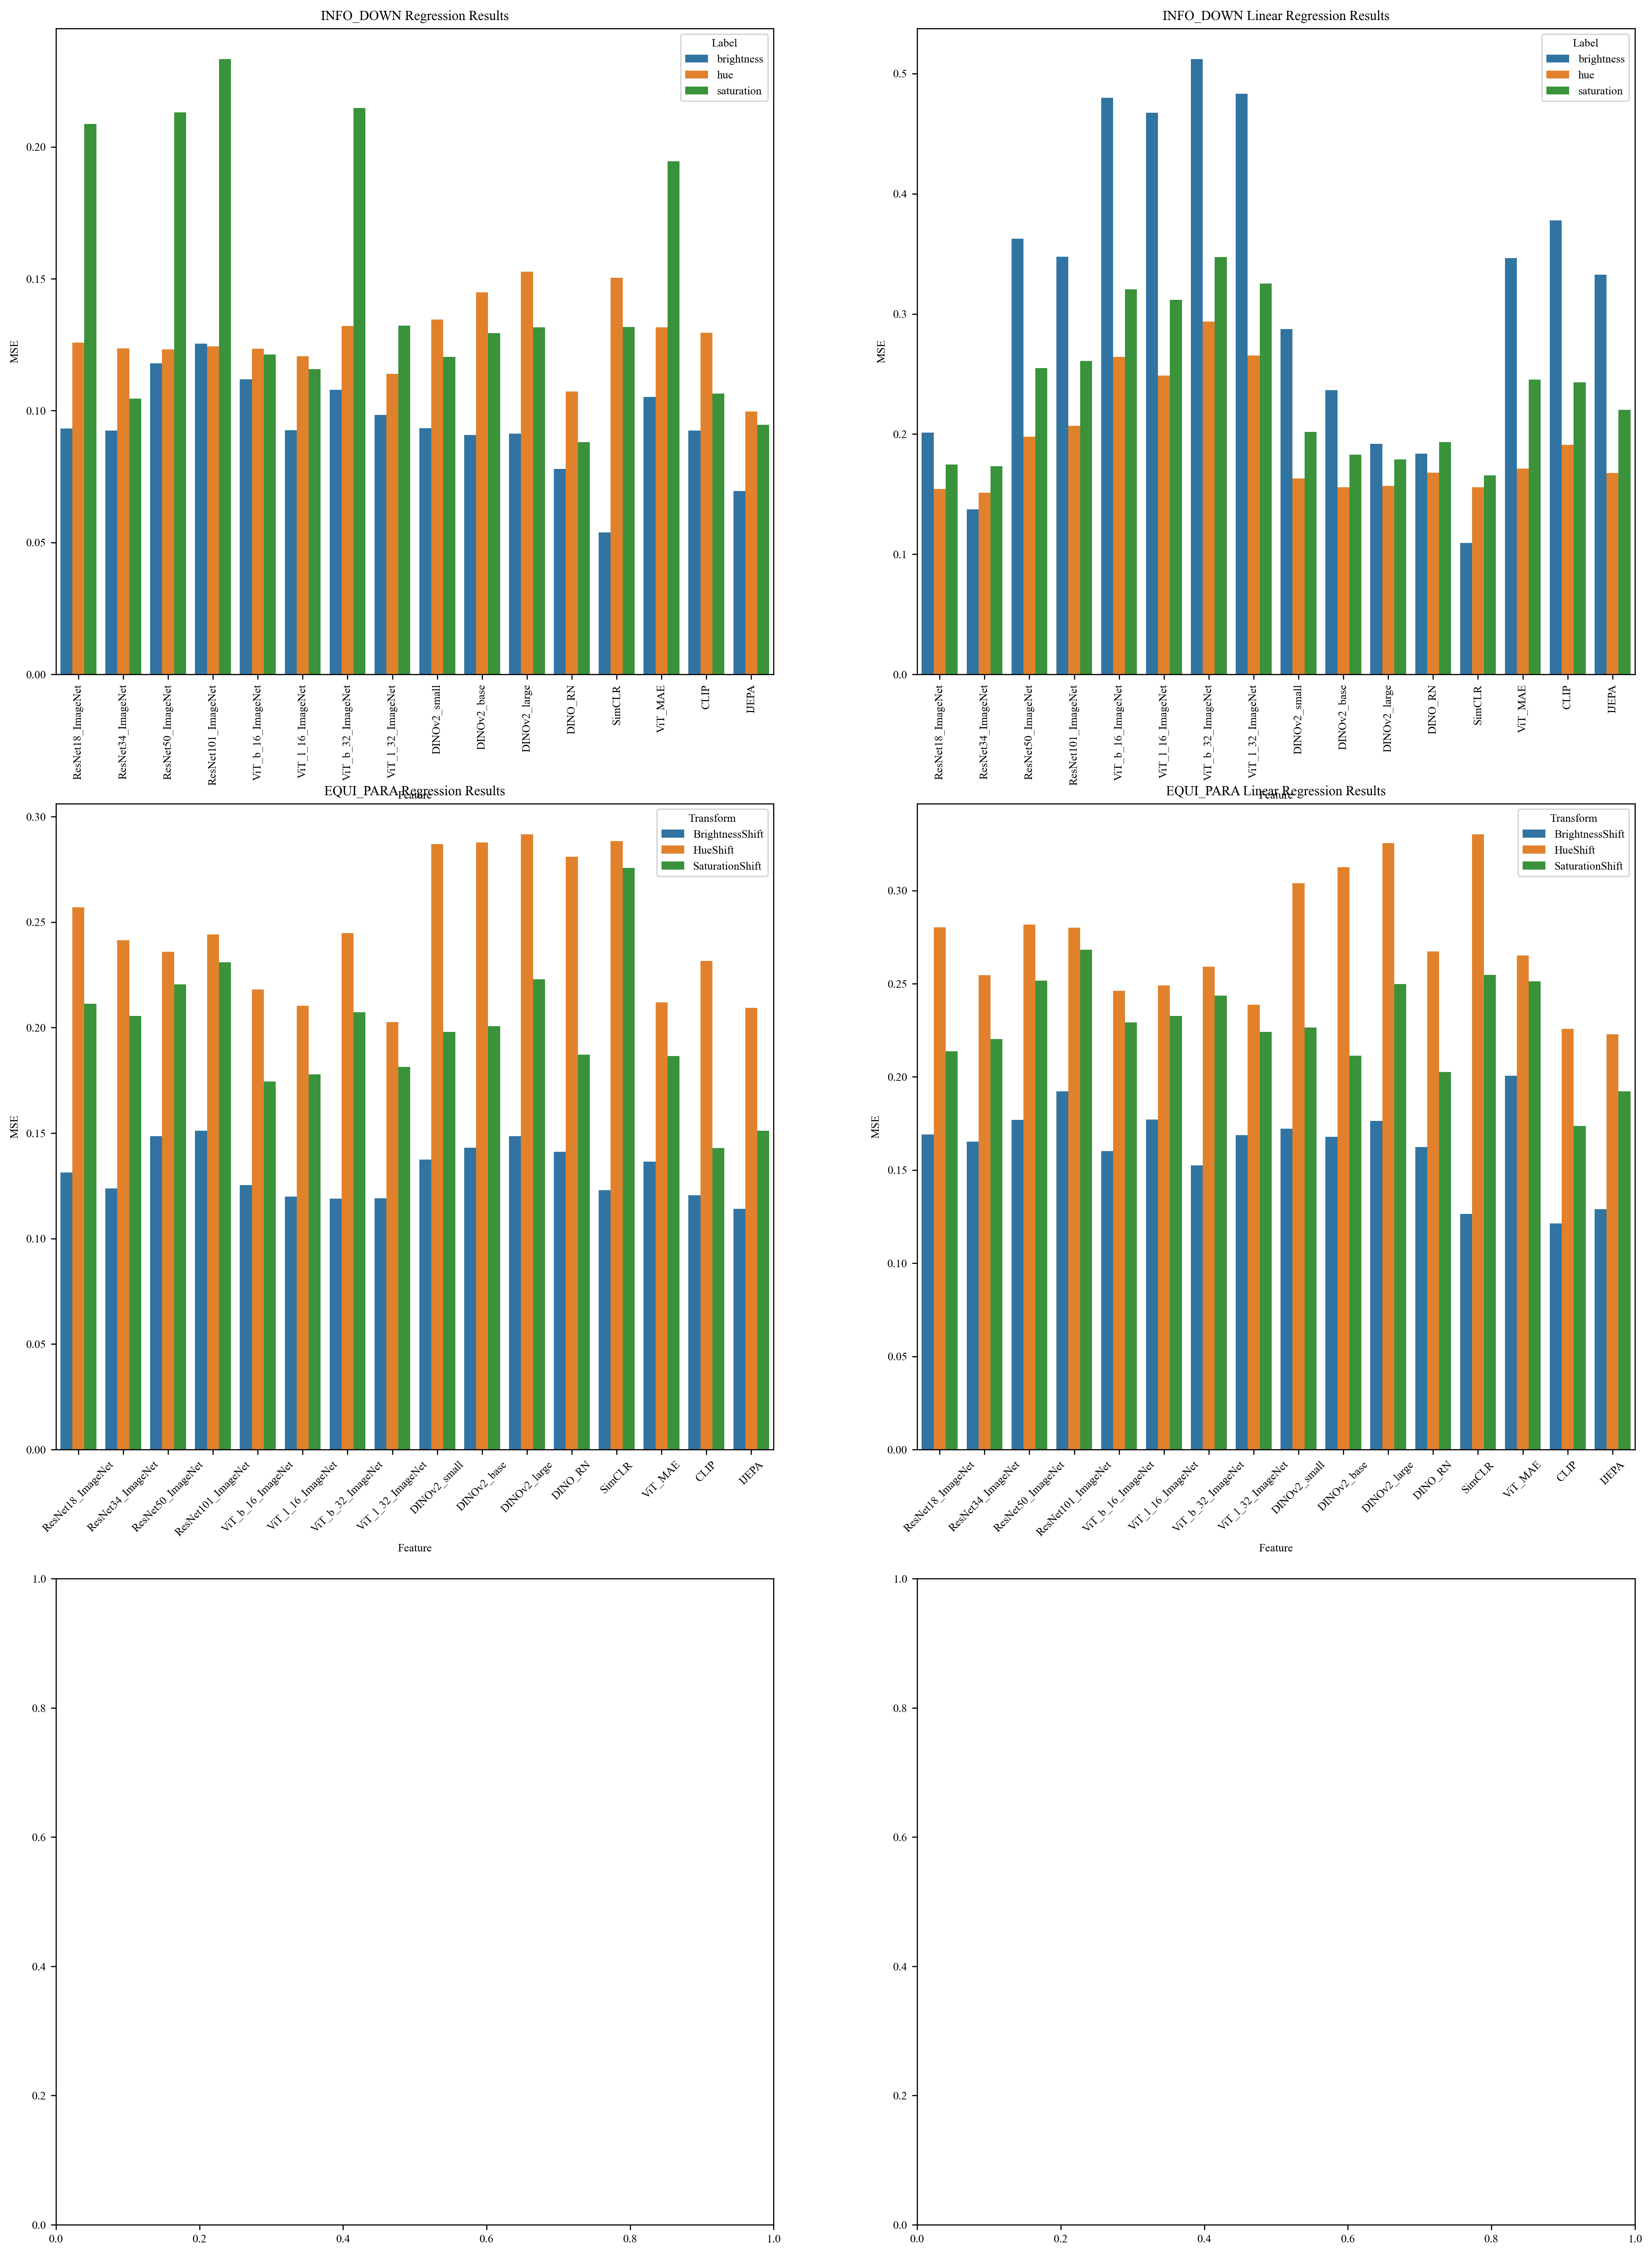

In [ ]:
import math

# Define consistent feature order
feature_order = [
    "ResNet18_ImageNet",
    "ResNet34_ImageNet",
    "ResNet50_ImageNet",
    "ResNet101_ImageNet",
    "ViT_b_16_ImageNet",
    "ViT_l_16_ImageNet",
    "ViT_b_32_ImageNet",
    "ViT_l_32_ImageNet",
    "DINOv2_small",
    "DINOv2_base",
    "DINOv2_large",
    "DINO_RN",
    "SimCLR",
    "ViT_MAE",
    "CLIP",
    "IJEPA",
]

# Constants for normalization
LABEL_SCALING = {
    "hue": 32400,  # 180^2
    "brightness": 65536,  # 256^2
    "saturation": 65536,  # 256^2
}
TRANSFORM_SCALING = {"HueShift": 1, "BrightnessShift": 1, "SaturationShift": 1}

# Create 2x3 subplot grid
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 28))

# 1. INFO_DOWN Plots
info_data = {"linear": [], "nonlinear": []}
for run_name, metrics in results.items():
    if "INFO_DOWN_regression_" in run_name:
        feature = next(f for f in feature_order if f in run_name)
        label = next(l for l in ["brightness", "hue", "saturation"] if l in run_name)
        # Compute RMSE by taking the square root after scaling
        scaled_rmse = math.sqrt(metrics["mse"] / LABEL_SCALING[label])

        if "linear" in run_name:
            info_data["linear"].append(
                {"Feature": feature, "Label": label, "MSE": scaled_rmse}
            )
        else:
            info_data["nonlinear"].append(
                {"Feature": feature, "Label": label, "MSE": scaled_rmse}
            )

df_info_nonlinear = pd.DataFrame(info_data["nonlinear"])
df_info_linear = pd.DataFrame(info_data["linear"])
sns.barplot(
    data=df_info_nonlinear,
    x="Feature",
    y="MSE",
    hue="Label",
    ax=ax1,
    order=feature_order,
)
sns.barplot(
    data=df_info_linear, x="Feature", y="MSE", hue="Label", ax=ax2, order=feature_order
)
ax1.set_title("INFO_DOWN Regression Results")
ax2.set_title("INFO_DOWN Linear Regression Results")
ax1.tick_params(axis="x", rotation=90)
ax2.tick_params(axis="x", rotation=90)

# 2. EQUI_PARA Plots
para_data = {"linear": [], "nonlinear": []}
for run_name, metrics in results.items():
    if "EQUI_PARA_regression_" in run_name:
        feature = next(f for f in feature_order if f in run_name)
        transform = next(
            t
            for t in ["BrightnessShift", "HueShift", "SaturationShift"]
            if t in run_name
        )
        # Compute RMSE for the transform error.
        scaled_rmse = math.sqrt(metrics["mse"] / TRANSFORM_SCALING[transform])

        if "linear" in run_name:
            para_data["linear"].append(
                {"Feature": feature, "Transform": transform, "MSE": scaled_rmse}
            )
        else:
            para_data["nonlinear"].append(
                {"Feature": feature, "Transform": transform, "MSE": scaled_rmse}
            )

df_para_nonlinear = pd.DataFrame(para_data["nonlinear"])
df_para_linear = pd.DataFrame(para_data["linear"])
sns.barplot(
    data=df_para_nonlinear,
    x="Feature",
    y="MSE",
    hue="Transform",
    ax=ax3,
    order=feature_order,
)
sns.barplot(
    data=df_para_linear,
    x="Feature",
    y="MSE",
    hue="Transform",
    ax=ax4,
    order=feature_order,
)
ax3.set_title("EQUI_PARA Regression Results")
ax4.set_title("EQUI_PARA Linear Regression Results")
ax3.tick_params(axis="x", rotation=45)
ax4.tick_params(axis="x", rotation=45)

# 3. EQUI_FEAT Plots
# The EQUI_FEAT task uses a cosine metric. If you want to calculate RMSE you would need an MSE value.
# If you already have an MSE value available, apply math.sqrt just like in the other tasks.
# Otherwise, if cosine is your measure of error, you may leave it as-is.
feat_data = {"linear": [], "nonlinear": []}
for run_name, metrics in results.items():
    if "EQUI_FEAT_regression_" in run_name:
        feature = next(f for f in feature_order if f in run_name)
        transform = next(
            t
            for t in ["BrightnessShift", "HueShift", "SaturationShift"]
            if t in run_name
        )
        # If you have MSE here instead of cosine, replace the next line with:
        # scaled_rmse = math.sqrt(metrics["mse"] / some_scaling_factor)
        scaled_rmse = metrics["cosine"]

        if "linear" in run_name:
            feat_data["linear"].append(
                {"Feature": feature, "Transform": transform, "MSE": scaled_rmse}
            )
        else:
            feat_data["nonlinear"].append(
                {"Feature": feature, "Transform": transform, "MSE": scaled_rmse}
            )

df_feat_nonlinear = pd.DataFrame(feat_data["nonlinear"])
df_feat_linear = pd.DataFrame(feat_data["linear"])
sns.barplot(
    data=df_feat_nonlinear,
    x="Feature",
    y="MSE",
    hue="Transform",
    ax=ax5,
    order=feature_order,
)
sns.barplot(
    data=df_feat_linear,
    x="Feature",
    y="MSE",
    hue="Transform",
    ax=ax6,
    order=feature_order,
)
ax5.set_title("EQUI_FEAT Regression Results")
ax6.set_title("EQUI_FEAT Linear Regression Results")
ax5.tick_params(axis="x", rotation=45)
ax6.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
        "font.size": 8,
        "figure.dpi": 300,  # Set display DPI
        "savefig.dpi": 300,  # Set save DPI
    }
)

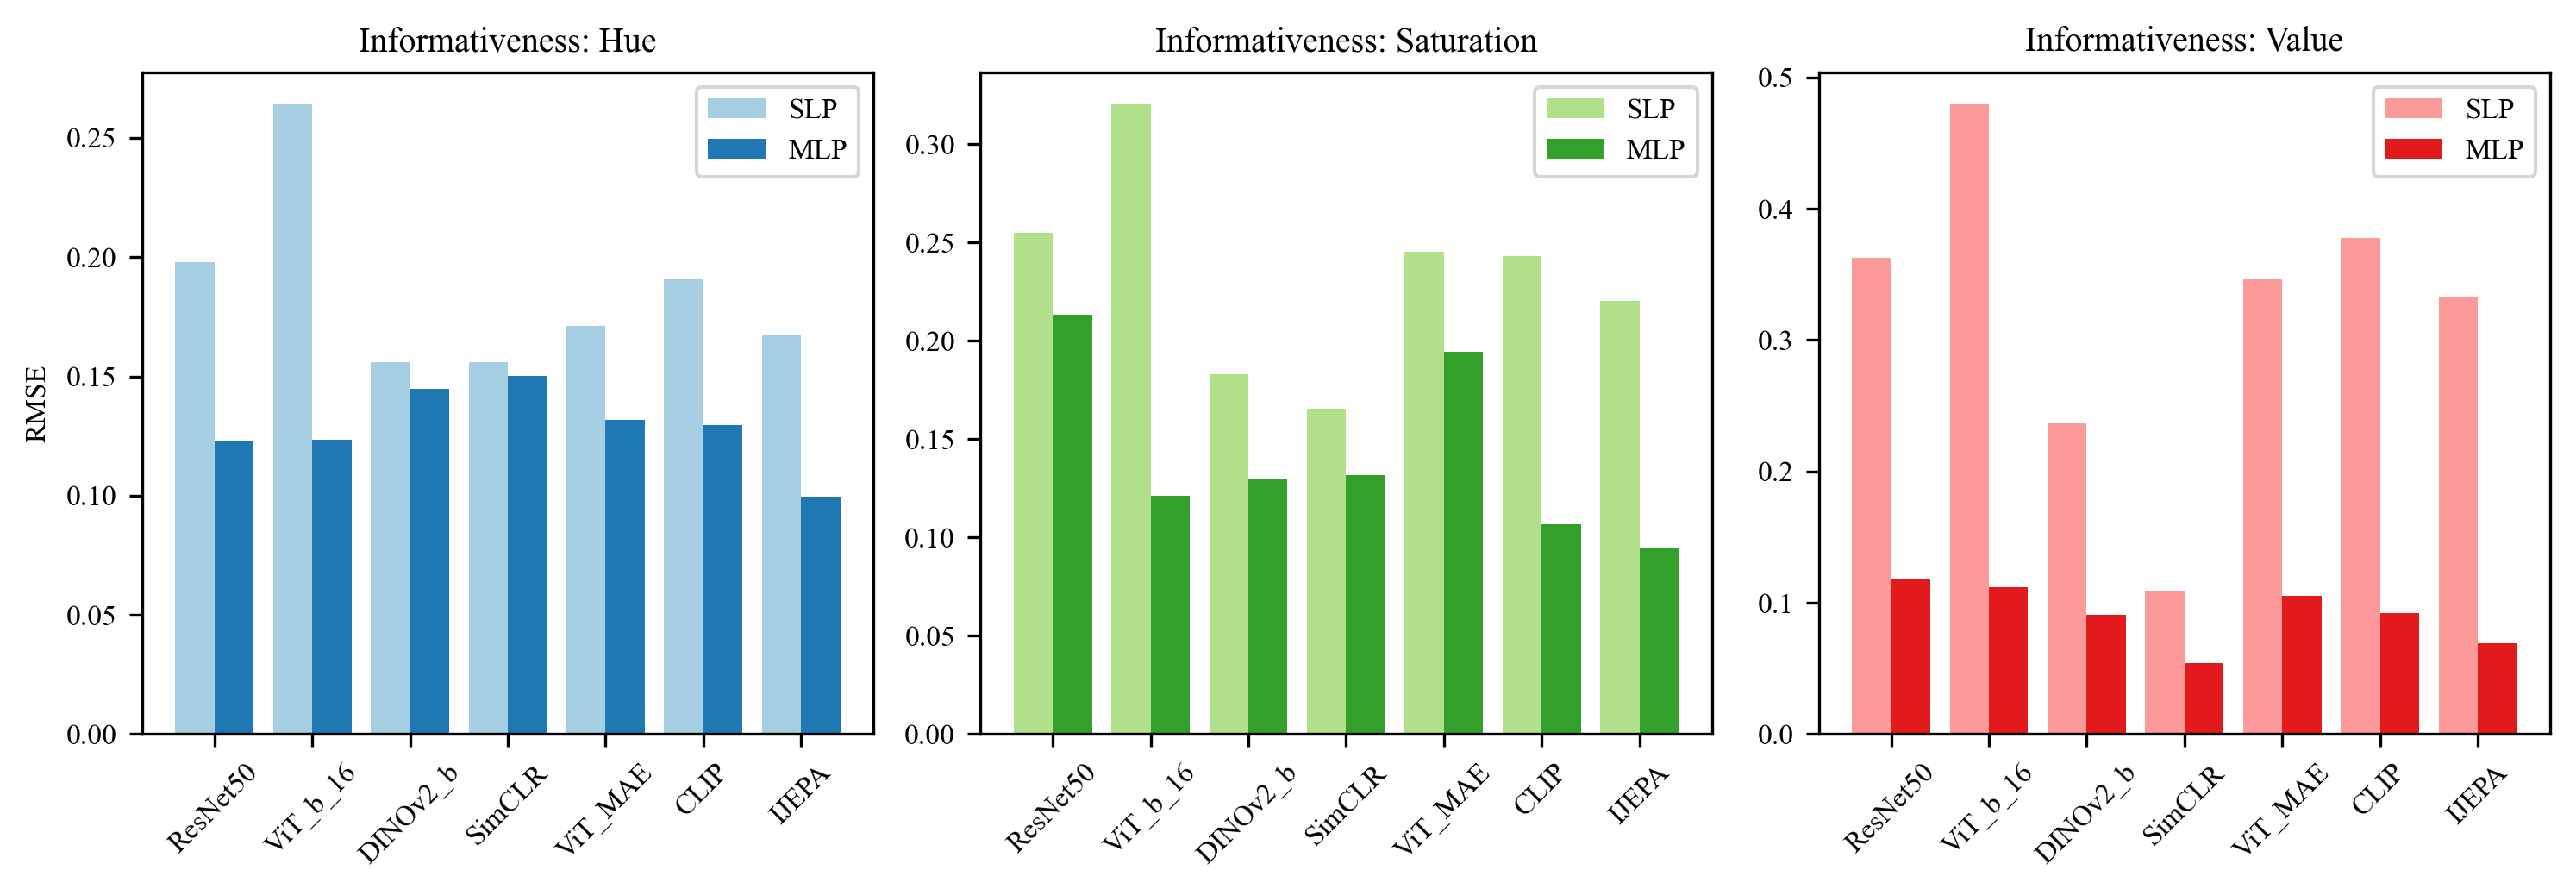

In [ ]:
# ----- INFO_DOWN Combined Plot with custom label order (h, s, v) -----
# Mark each probe type
df_info_linear["Type"] = "SLP"
df_info_nonlinear["Type"] = "MLP"
df_info_combined = pd.concat([df_info_linear, df_info_nonlinear])

# Define only the features (models) to plot
features_to_plot = [
    "ResNet50_ImageNet",
    "ViT_b_16_ImageNet",
    "DINOv2_base",
    "SimCLR",
    "ViT_MAE",
    "CLIP",
    "IJEPA",
]

# Instead of sorting, force the order: hue, saturation, brightness (shown as value)
desired_order = ["hue", "saturation", "brightness"]
# Ensure only labels that exist in the data are kept:
info_labels = [
    lbl for lbl in desired_order if lbl in df_info_combined["Label"].unique()
]

cmap = plt.get_cmap("Paired")
fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))
if len(info_labels) == 1:
    axes = [axes]  # ensure iterable axis

for i, label in enumerate(info_labels):
    df_label = df_info_combined[df_info_combined["Label"] == label]
    # Pivot so each feature gets both SLP and MLP values
    pivot = df_label.pivot(index="Feature", columns="Type", values="MSE")
    # Filter the pivot table to only the features you want and maintain order
    pivot = pivot.reindex(features_to_plot)
    x = np.arange(len(pivot.index))
    bar_width = 0.4

    # Remove "_ImageNet" from the feature names for display and apply other modifications
    display_features = [
        feat.replace("_ImageNet", "")
        .replace("small", "s")
        .replace("base", "b")
        .replace("large", "l")
        for feat in pivot.index
    ]

    # Use different colors for each plot:
    color_slp = cmap(i * 2)
    color_mlp = cmap(i * 2 + 1)

    axes[i].bar(
        x - bar_width / 2, pivot["SLP"], width=bar_width, color=color_slp, label="SLP"
    )
    axes[i].bar(
        x + bar_width / 2, pivot["MLP"], width=bar_width, color=color_mlp, label="MLP"
    )
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(display_features, rotation=45)
    # Map brightness to value for display purposes
    label_map = {"brightness": "value", "hue": "hue", "saturation": "saturation"}
    axes[i].set_title(f"Informativeness: {label_map[label].capitalize()}")
    if i == 0:
        axes[i].set_ylabel("RMSE")
    axes[i].legend()

plt.tight_layout()
plt.show()

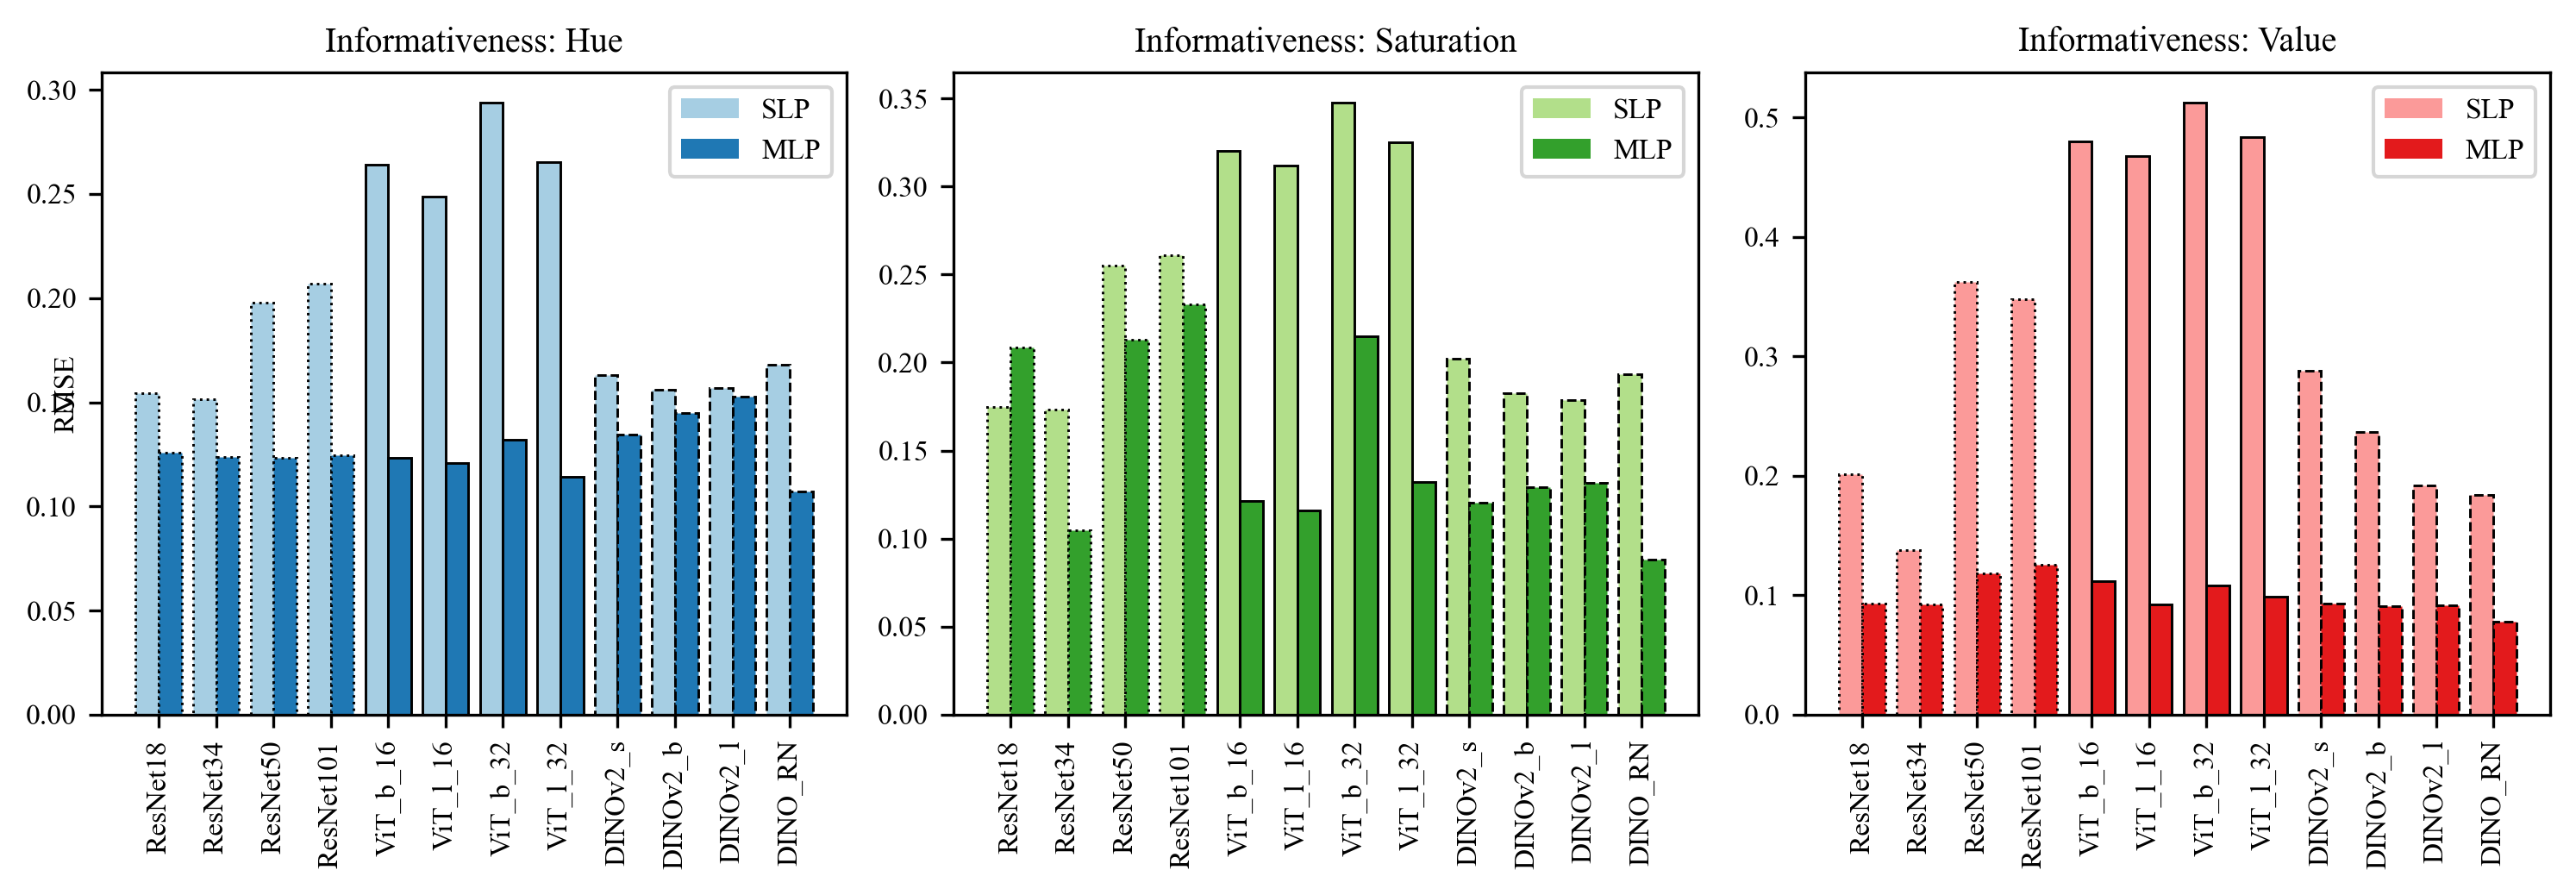

In [ ]:
# ----- INFO_DOWN Combined Plot -----
# Mark each probe type
df_info_linear["Type"] = "SLP"
df_info_nonlinear["Type"] = "MLP"
df_info_combined = pd.concat([df_info_linear, df_info_nonlinear])

# Define only the features (models) to plot
features_to_plot = [
    "ResNet18_ImageNet",
    "ResNet34_ImageNet",
    "ResNet50_ImageNet",
    "ResNet101_ImageNet",
    "ViT_b_16_ImageNet",
    "ViT_l_16_ImageNet",
    "ViT_b_32_ImageNet",
    "ViT_l_32_ImageNet",
    "DINOv2_small",
    "DINOv2_base",
    "DINOv2_large",
    "DINO_RN",
]

# Force the order: hue, saturation, brightness (to be mapped to value)
desired_order = ["hue", "saturation", "brightness"]
# Ensure only labels present in the data are used, preserving the desired order:
info_labels = [
    lbl for lbl in desired_order if lbl in df_info_combined["Label"].unique()
]

# Define line styles for each feature category
edge_dict = {
    "ResNet": "dotted",
    "ViT": "solid",
    "DINO": "dashed",
}
edge_width = 0.7  # adjust as needed

cmap = plt.get_cmap("Paired")
fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))
if len(info_labels) == 1:
    axes = [axes]  # ensure iterable axis

for i, label in enumerate(info_labels):
    df_label = df_info_combined[df_info_combined["Label"] == label]
    # Pivot so each feature gets both SLP and MLP values
    pivot = df_label.pivot(index="Feature", columns="Type", values="MSE")
    # Filter the pivot table to only the features you want and maintain order
    pivot = pivot.reindex(features_to_plot)
    x = np.arange(len(pivot.index))
    bar_width = 0.4

    if i == 0:
        axes[i].set_ylabel("RMSE")
        axes[i].yaxis.labelpad = -15

    # Remove "_ImageNet" from the feature names for display
    display_features = [
        feat.replace("_ImageNet", "")
        .replace("small", "s")
        .replace("base", "b")
        .replace("large", "l")
        for feat in pivot.index
    ]

    # Use different colors for each plot:
    color_slp = cmap(i * 2)
    color_mlp = cmap(i * 2 + 1)

    bars_slp = axes[i].bar(
        x - bar_width / 2, pivot["SLP"], width=bar_width, color=color_slp, label="SLP"
    )
    bars_mlp = axes[i].bar(
        x + bar_width / 2, pivot["MLP"], width=bar_width, color=color_mlp, label="MLP"
    )

    # Set edge style for each bar based on its feature name
    for idx, rect in enumerate(bars_slp):
        feature = pivot.index[idx]
        for prefix, linestyle in edge_dict.items():
            if feature.startswith(prefix):
                rect.set_edgecolor("black")
                rect.set_linestyle(linestyle)
                rect.set_linewidth(edge_width)
                break

    for idx, rect in enumerate(bars_mlp):
        feature = pivot.index[idx]
        for prefix, linestyle in edge_dict.items():
            if feature.startswith(prefix):
                rect.set_edgecolor("black")
                rect.set_linestyle(linestyle)
                rect.set_linewidth(edge_width)
                break

    axes[i].set_xticks(x)
    axes[i].set_xticklabels(display_features, rotation=90)
    # Map brightness to "value" for display purposes
    label_map = {"hue": "hue", "saturation": "saturation", "brightness": "value"}
    axes[i].set_title(f"Informativeness: {label_map[label].capitalize()}")
    if i == 0:
        axes[i].set_ylabel("RMSE")
    leg = axes[i].legend()
    for handle in leg.get_patches():
        handle.set_edgecolor("none")

plt.tight_layout()
plt.show()

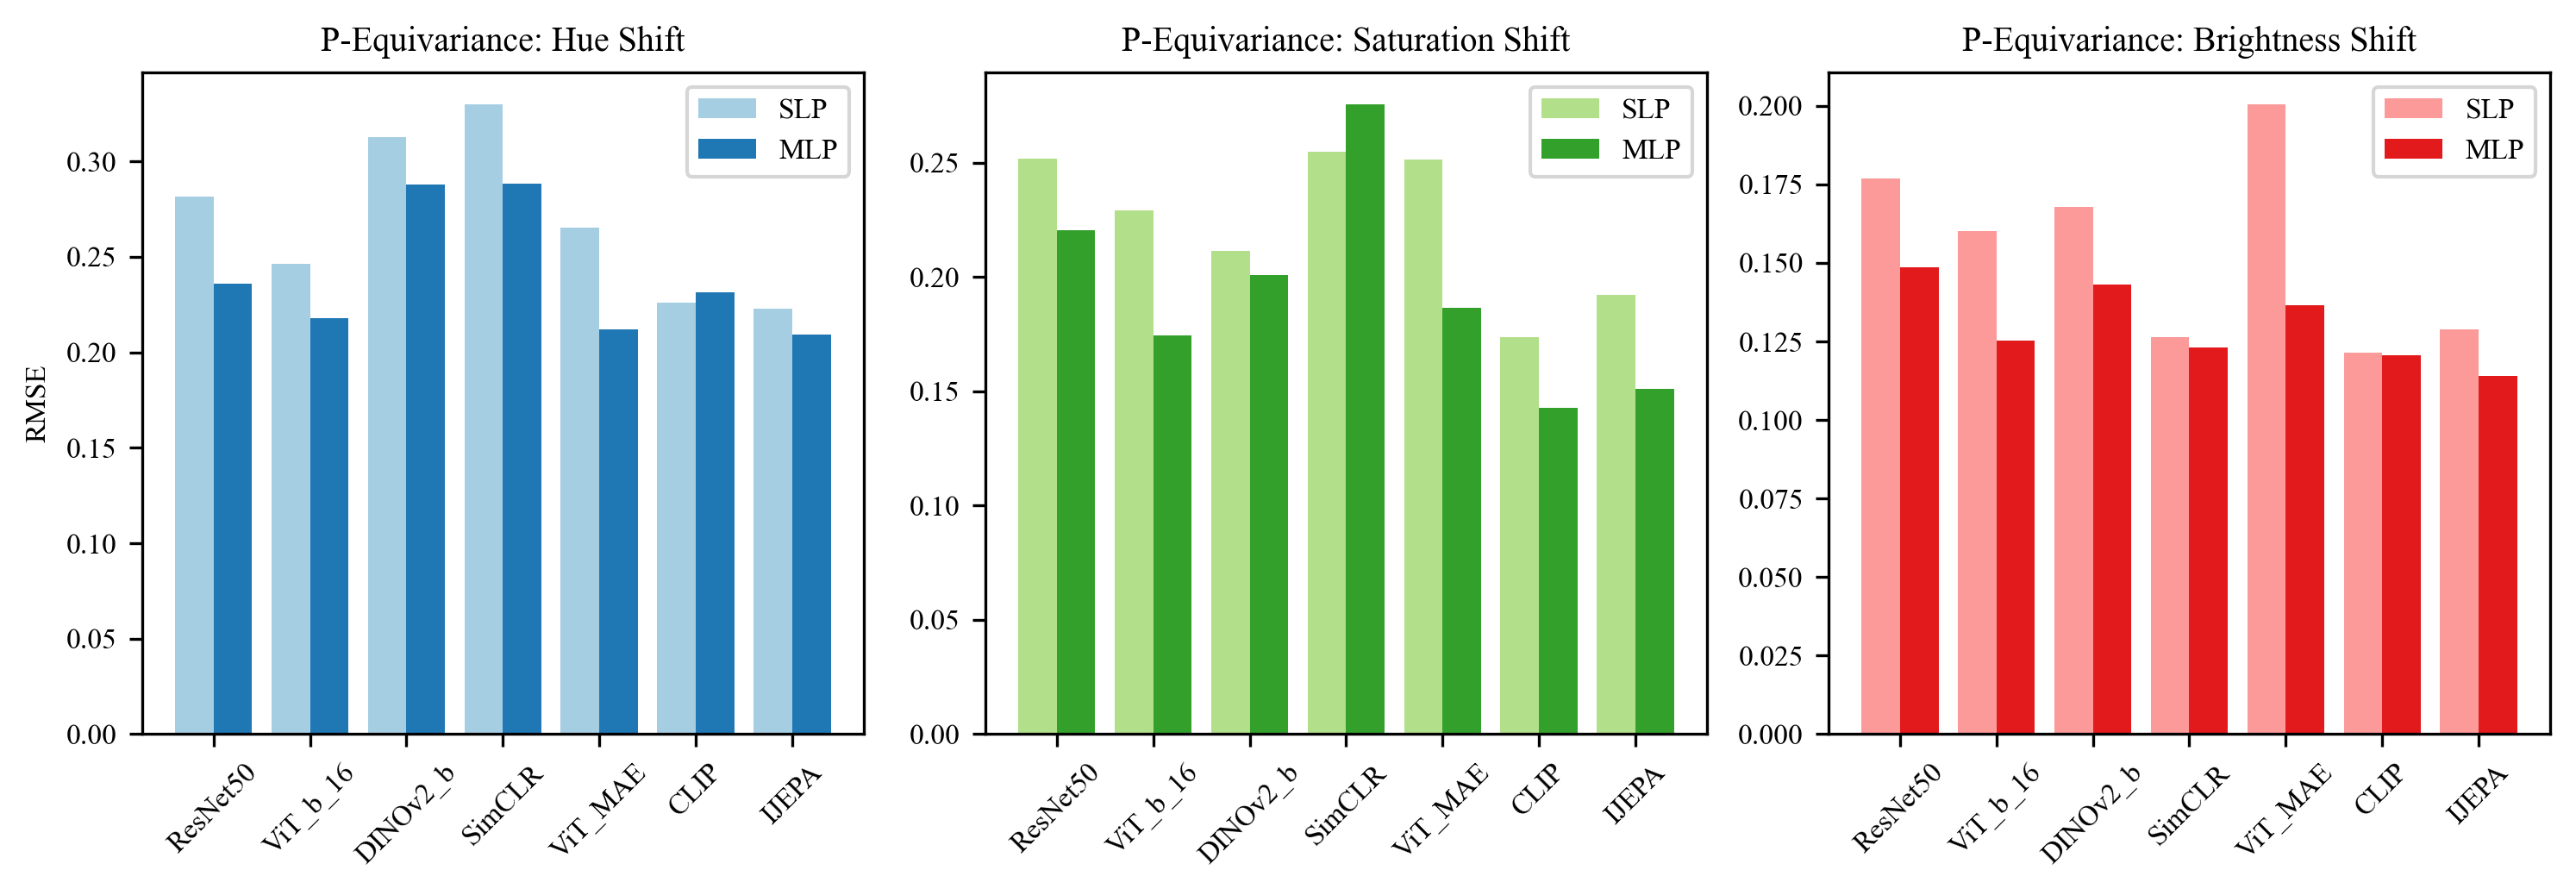

In [ ]:
# ----- EQUI_PARA Combined Plot (Main Visualization) -----
df_para_linear["Type"] = "SLP"
df_para_nonlinear["Type"] = "MLP"
df_para_combined = pd.concat([df_para_linear, df_para_nonlinear])

# Define the subset of features to plot (main models)
features_to_plot = [
    "ResNet50_ImageNet",
    "ViT_b_16_ImageNet",
    "DINOv2_base",
    "SimCLR",
    "ViT_MAE",
    "CLIP",
    "IJEPA",
]

# Specify the desired order of transforms
transforms = ["HueShift", "SaturationShift", "BrightnessShift"]

cmap = plt.get_cmap("Paired")
fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))
if len(transforms) == 1:
    axes = [axes]

# Rest of the code remains the same...
for i, transform in enumerate(transforms):
    df_trans = df_para_combined[df_para_combined["Transform"] == transform]
    pivot = df_trans.pivot(index="Feature", columns="Type", values="MSE")
    pivot = pivot.reindex(features_to_plot)
    x = np.arange(len(pivot.index))
    bar_width = 0.4

    color_slp = cmap(i * 2)
    color_mlp = cmap(i * 2 + 1)

    axes[i].bar(
        x - bar_width / 2, pivot["SLP"], width=bar_width, color=color_slp, label="SLP"
    )
    axes[i].bar(
        x + bar_width / 2, pivot["MLP"], width=bar_width, color=color_mlp, label="MLP"
    )

    axes[i].set_xticks(x)
    display_features = [
        feat.replace("_ImageNet", "")
        .replace("small", "s")
        .replace("base", "b")
        .replace("large", "l")
        for feat in pivot.index
    ]
    axes[i].set_xticklabels(display_features, rotation=45)
    title_map = {
        "BrightnessShift": "Brightness Shift",
        "HueShift": "Hue Shift",
        "SaturationShift": "Saturation Shift",
    }
    axes[i].set_title(f"P-Equivariance: {title_map[transform]}")
    if i == 0:
        axes[i].set_ylabel("RMSE")
    axes[i].legend()

plt.tight_layout()
plt.show()

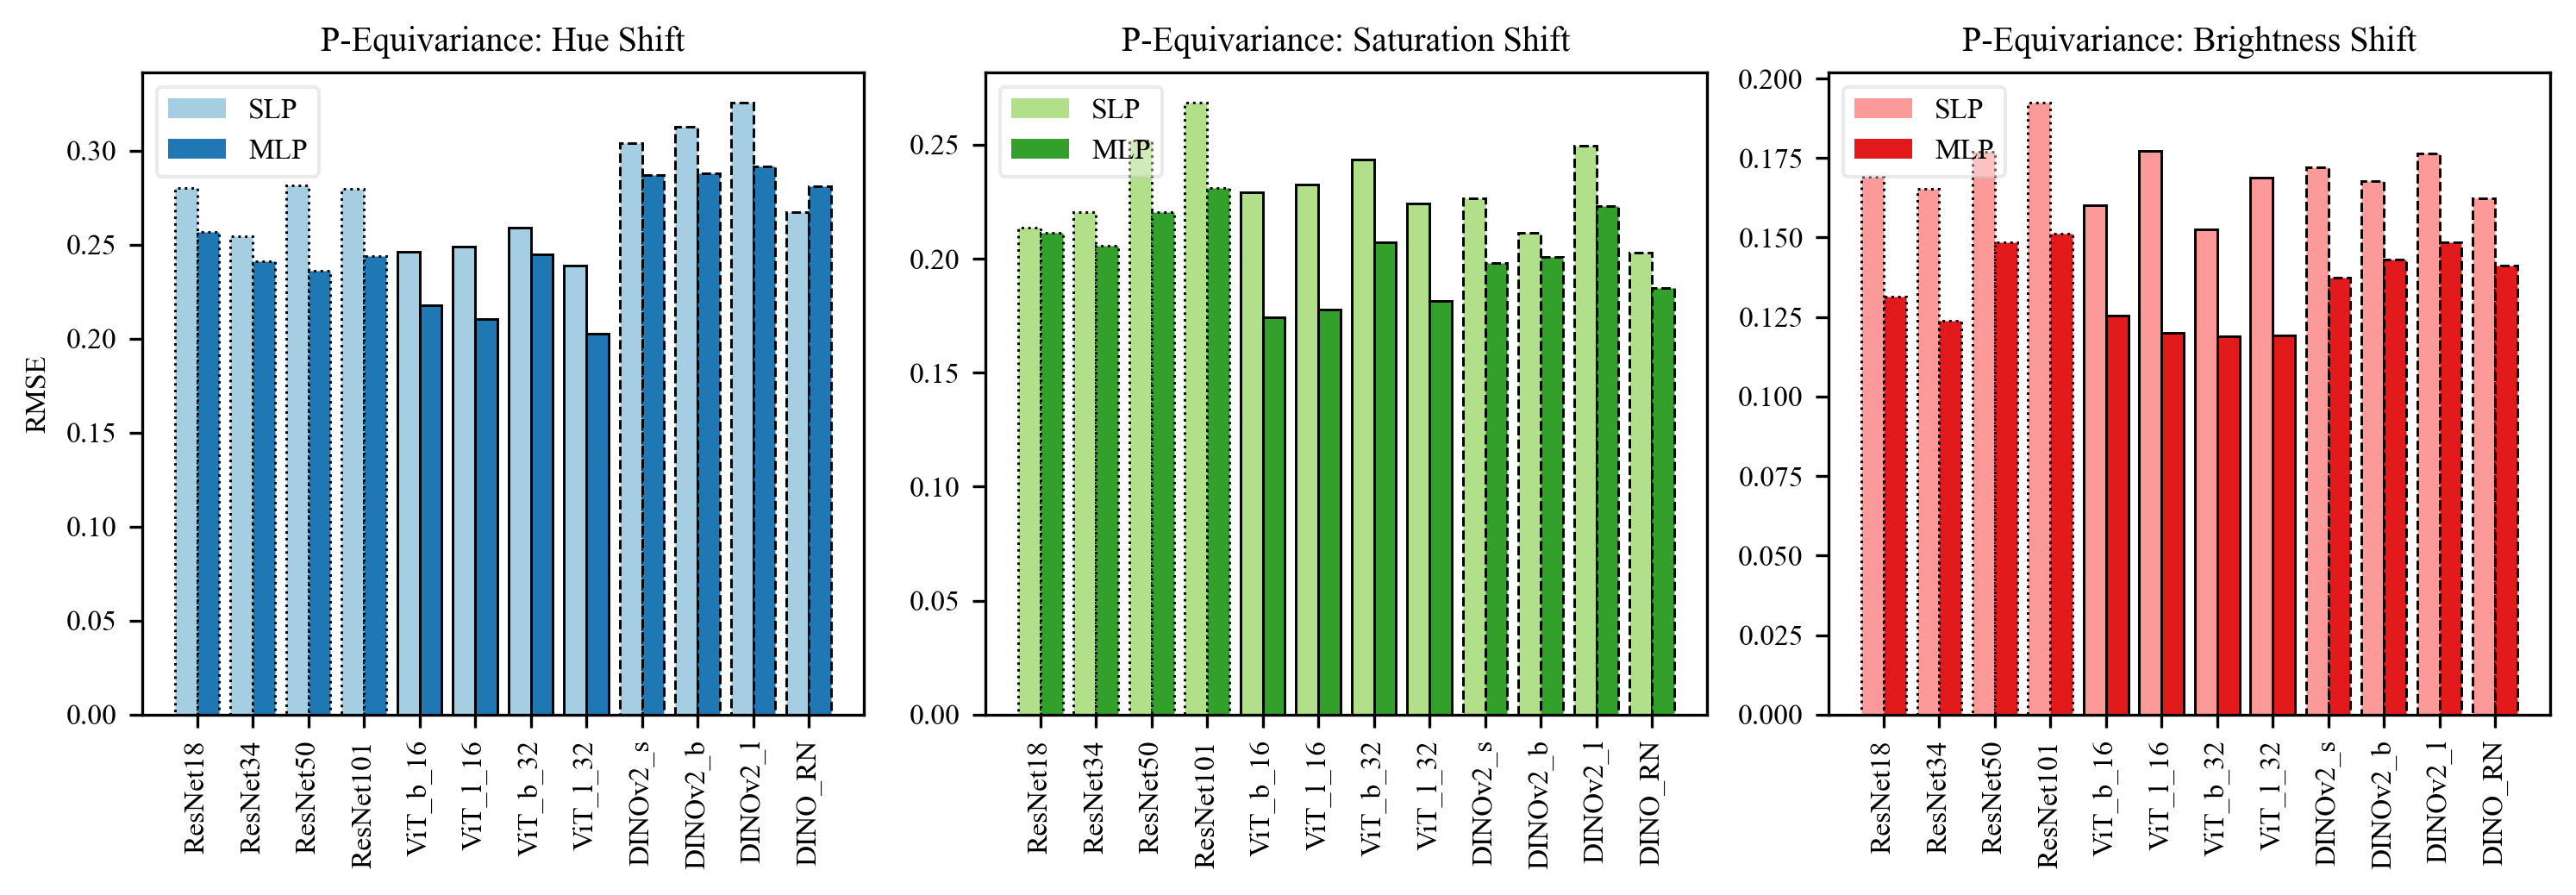

In [ ]:
# ----- EQUI_PARA Combined Plot (Ablation) -----
df_para_linear["Type"] = "SLP"
df_para_nonlinear["Type"] = "MLP"
df_para_combined = pd.concat([df_para_linear, df_para_nonlinear])

# Use the full feature_order for ablation
features_to_plot = [
    "ResNet18_ImageNet",
    "ResNet34_ImageNet",
    "ResNet50_ImageNet",
    "ResNet101_ImageNet",
    "ViT_b_16_ImageNet",
    "ViT_l_16_ImageNet",
    "ViT_b_32_ImageNet",
    "ViT_l_32_ImageNet",
    "DINOv2_small",
    "DINOv2_base",
    "DINOv2_large",
    "DINO_RN",
]

# Get unique transform names
# transforms = sorted(df_para_combined["Transform"].unique())
transforms = ["HueShift", "SaturationShift", "BrightnessShift"]

# Define edge styles based on feature family
edge_dict = {
    "ResNet": "dotted",
    "ViT": "solid",
    "DINO": "dashed",
}
edge_width = 0.7

cmap = plt.get_cmap("Paired")
fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))
if len(transforms) == 1:
    axes = [axes]

for i, transform in enumerate(transforms):
    df_trans = df_para_combined[df_para_combined["Transform"] == transform]
    pivot = df_trans.pivot(index="Feature", columns="Type", values="MSE")
    pivot = pivot.reindex(features_to_plot)
    x = np.arange(len(pivot.index))
    bar_width = 0.4

    color_slp = cmap(i * 2)
    color_mlp = cmap(i * 2 + 1)

    bars_slp = axes[i].bar(
        x - bar_width / 2, pivot["SLP"], width=bar_width, color=color_slp, label="SLP"
    )
    bars_mlp = axes[i].bar(
        x + bar_width / 2, pivot["MLP"], width=bar_width, color=color_mlp, label="MLP"
    )

    # Set edge style for each bar based on the feature prefix
    for idx, rect in enumerate(bars_slp):
        feature = pivot.index[idx]
        for prefix, linestyle in edge_dict.items():
            if feature.startswith(prefix):
                rect.set_edgecolor("black")
                rect.set_linestyle(linestyle)
                rect.set_linewidth(edge_width)
                break

    for idx, rect in enumerate(bars_mlp):
        feature = pivot.index[idx]
        for prefix, linestyle in edge_dict.items():
            if feature.startswith(prefix):
                rect.set_edgecolor("black")
                rect.set_linestyle(linestyle)
                rect.set_linewidth(edge_width)
                break

    axes[i].set_xticks(x)
    display_features = [
        feat.replace("_ImageNet", "")
        .replace("small", "s")
        .replace("base", "b")
        .replace("large", "l")
        for feat in pivot.index
    ]
    axes[i].set_xticklabels(display_features, rotation=90)
    title_map = {
        "BrightnessShift": "Brightness Shift",
        "HueShift": "Hue Shift",
        "SaturationShift": "Saturation Shift",
    }
    axes[i].set_title(f"P-Equivariance: {title_map[transform]}")
    if i == 0:
        axes[i].set_ylabel("RMSE")
    leg = axes[i].legend(loc="upper left")
    for handle in leg.get_patches():
        handle.set_edgecolor("none")
    leg.get_frame().set_alpha(0.4)

plt.tight_layout()
plt.show()

Duplicate groups:
Empty DataFrame
Columns: [Feature, Transform, Cosine, Type]
Index: []
Duplicate groups:
Empty DataFrame
Columns: [Feature, Transform, Cosine, Type]
Index: []
Duplicate groups:
Empty DataFrame
Columns: [Feature, Transform, Cosine, Type]
Index: []


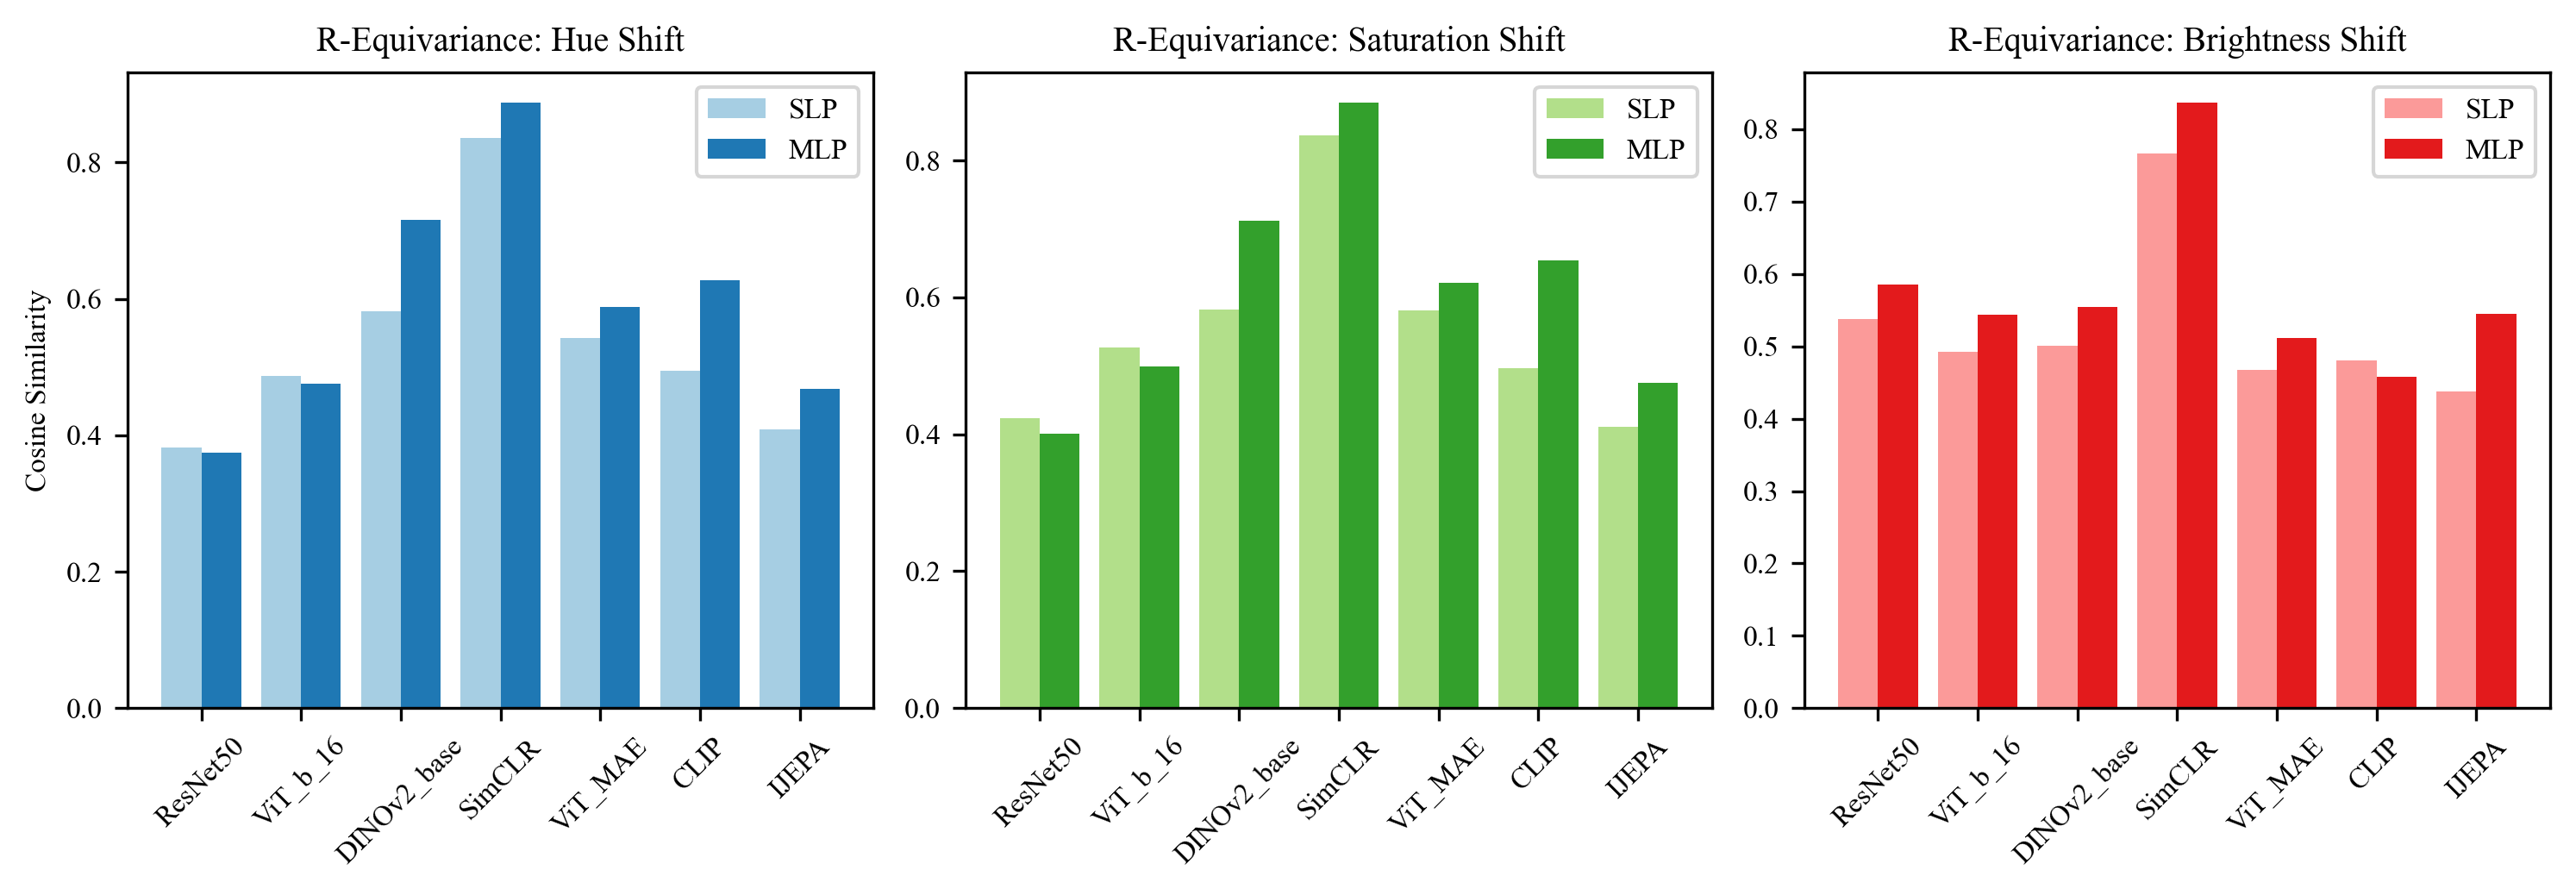

In [ ]:
temp_feature_order = feature_order

# ----- EQUI_FEAT Combined Plot (Main Visualization using Cosine metric) -----
# Create cosine data for EQUI_FEAT from results
feat_cosine_data = {"linear": [], "nonlinear": []}
for run_name, metrics in results.items():
    if "EQUI_FEAT_regression_" in run_name:
        feature = next((f for f in temp_feature_order if f in run_name), None)
        transform = next(
            t
            for t in [
                "HueShift",
                "SaturationShift",
                "BrightnessShift",
            ]
            if t in run_name
        )
        # Use cosine metric from results
        cosine_val = metrics["cosine"]
        if "linear" in run_name:
            feat_cosine_data["linear"].append(
                {"Feature": feature, "Transform": transform, "Cosine": cosine_val}
            )
        else:
            feat_cosine_data["nonlinear"].append(
                {"Feature": feature, "Transform": transform, "Cosine": cosine_val}
            )

df_feat_cosine_linear = pd.DataFrame(feat_cosine_data["linear"])
df_feat_cosine_nonlinear = pd.DataFrame(feat_cosine_data["nonlinear"])

# Mark each probe type
df_feat_cosine_linear["Type"] = "SLP"
df_feat_cosine_nonlinear["Type"] = "MLP"
df_feat_cosine_combined = pd.concat([df_feat_cosine_linear, df_feat_cosine_nonlinear])

# Define a subset of features (models) to plot
features_to_plot = [
    "ResNet50_ImageNet",
    "ViT_b_16_ImageNet",
    "DINOv2_base",
    "SimCLR",
    "ViT_MAE",
    "CLIP",
    "IJEPA",
]

# Get unique transform names in desired order
cosine_transforms = ["HueShift", "SaturationShift", "BrightnessShift"]

cmap = plt.get_cmap("Paired")

fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))

for i, transform in enumerate(cosine_transforms):
    df_trans = df_feat_cosine_combined[
        df_feat_cosine_combined["Transform"] == transform
    ]
    duplicate_groups = df_trans.groupby(["Feature", "Type"]).filter(
        lambda x: len(x) > 1
    )
    print("Duplicate groups:")
    print(duplicate_groups)

    pivot = df_trans.pivot_table(
        index="Feature", columns="Type", values="Cosine", aggfunc="mean"
    )
    pivot = pivot.reindex(features_to_plot)
    x = np.arange(len(pivot.index))
    bar_width = 0.4

    color_slp = cmap(i * 2)
    color_mlp = cmap(i * 2 + 1)

    axes[i].bar(
        x - bar_width / 2, pivot["SLP"], width=bar_width, color=color_slp, label="SLP"
    )
    axes[i].bar(
        x + bar_width / 2, pivot["MLP"], width=bar_width, color=color_mlp, label="MLP"
    )

    axes[i].set_xticks(x)
    # Remove "_ImageNet" for display clarity
    display_features = [feat.replace("_ImageNet", "") for feat in pivot.index]
    axes[i].set_xticklabels(display_features, rotation=45)
    transform_map = {
        "BrightnessShift": "Brightness Shift",
        "HueShift": "Hue Shift",
        "SaturationShift": "Saturation Shift",
    }
    axes[i].set_title(f"R-Equivariance: {transform_map[transform]}")
    if i == 0:
        axes[i].set_ylabel("Cosine Similarity")
    axes[i].legend()

plt.tight_layout()
plt.show()

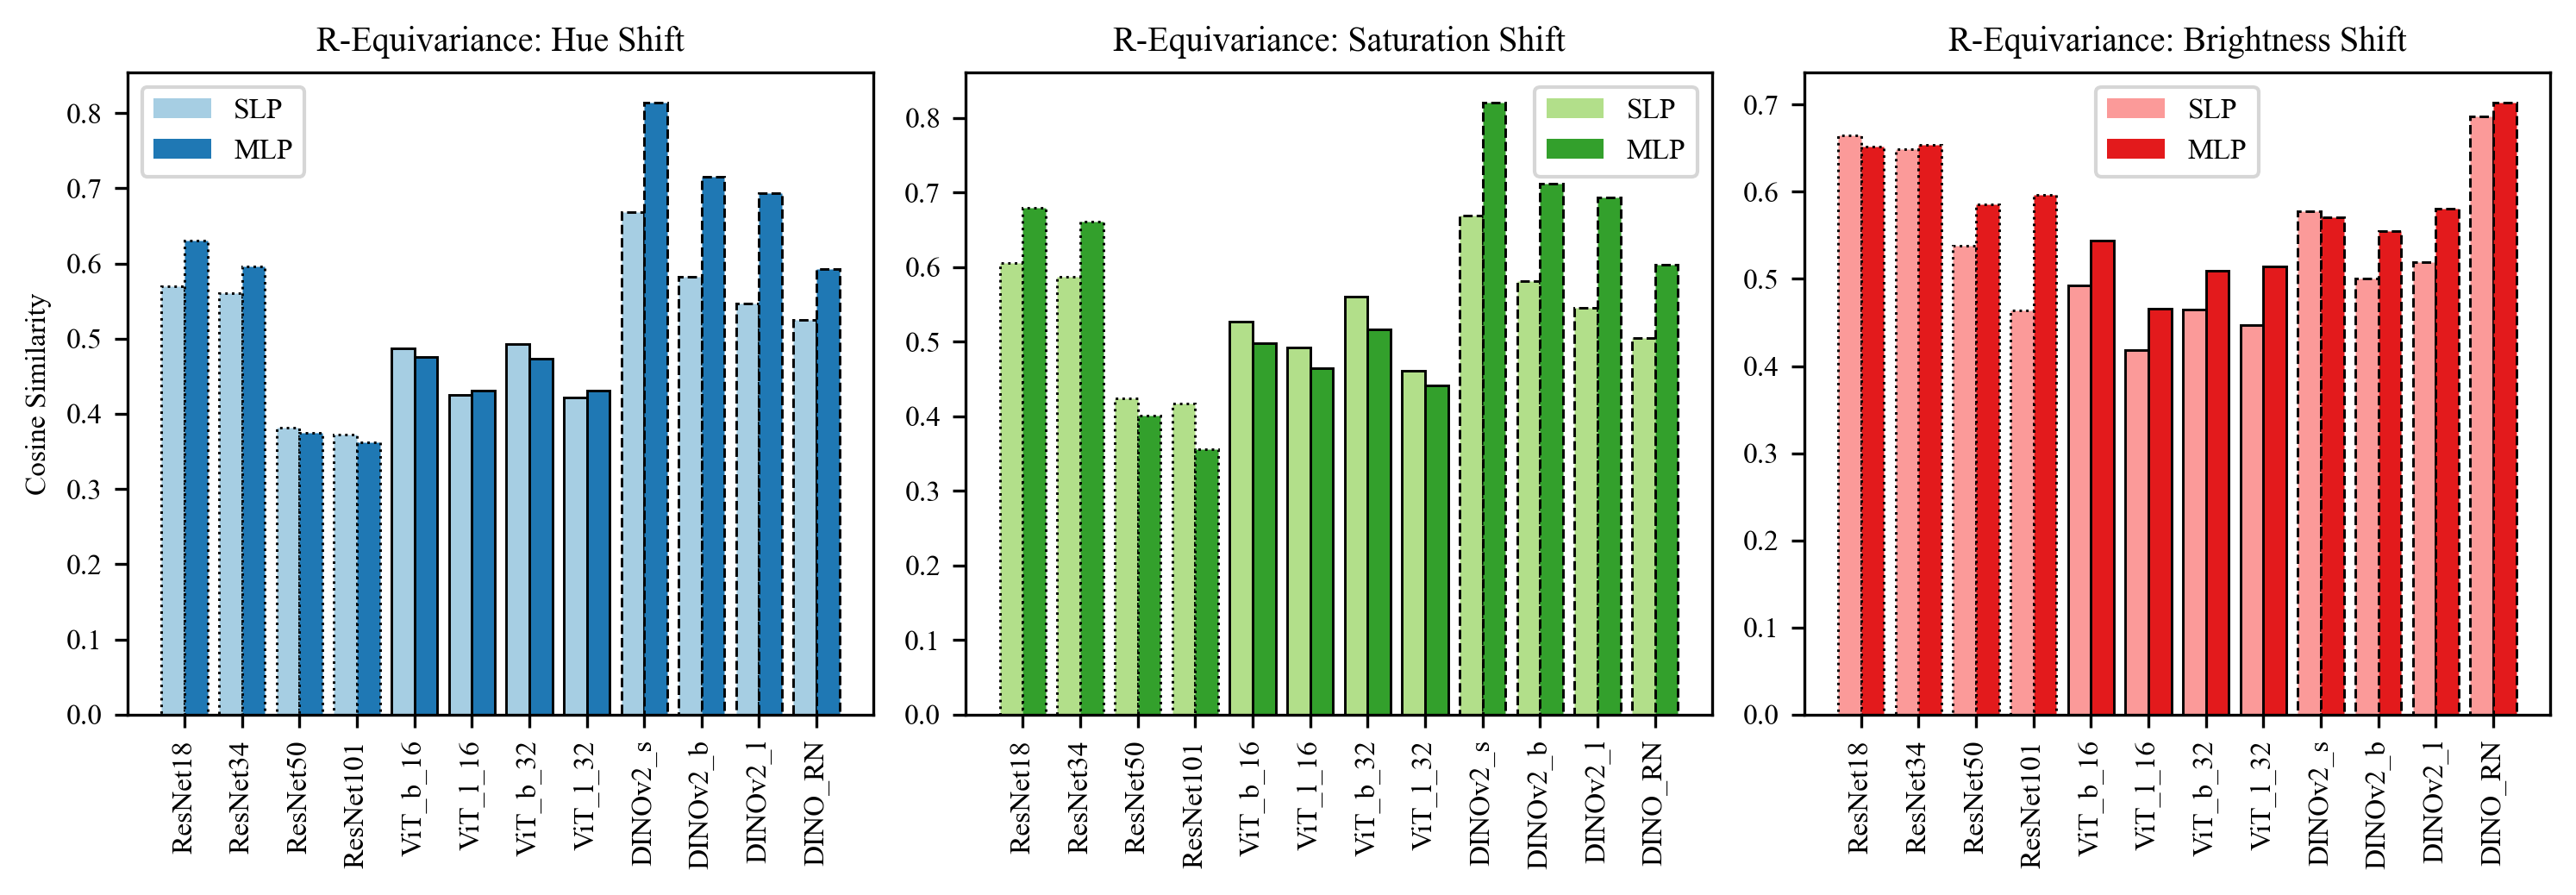

In [ ]:
# ----- EQUI_FEAT Combined Plot (Ablation using Cosine metric with display modifications) -----
# Mark each probe type
df_feat_cosine_linear["Type"] = "SLP"
df_feat_cosine_nonlinear["Type"] = "MLP"
df_feat_cosine_combined = pd.concat([df_feat_cosine_linear, df_feat_cosine_nonlinear])

# Use the full feature order for display modifications
features_to_plot = [
    "ResNet18_ImageNet",
    "ResNet34_ImageNet",
    "ResNet50_ImageNet",
    "ResNet101_ImageNet",
    "ViT_b_16_ImageNet",
    "ViT_l_16_ImageNet",
    "ViT_b_32_ImageNet",
    "ViT_l_32_ImageNet",
    "DINOv2_small",
    "DINOv2_base",
    "DINOv2_large",
    "DINO_RN",
]
# Get unique transform names (e.g., BrightnessShift, HueShift, SaturationShift)
cosine_transforms = ["HueShift", "SaturationShift", "BrightnessShift"]

# Define edge styles based on feature prefix
edge_dict = {
    "ResNet": "dotted",
    "ViT": "solid",
    "DINO": "dashed",
}
edge_width = 0.7

cmap = plt.get_cmap("Paired")
fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))
if len(cosine_transforms) == 1:
    axes = [axes]

for i, transform in enumerate(cosine_transforms):
    df_trans = df_feat_cosine_combined[
        df_feat_cosine_combined["Transform"] == transform
    ]
    pivot = df_trans.pivot_table(
        index="Feature", columns="Type", values="Cosine", aggfunc="mean"
    )
    pivot = pivot.reindex(features_to_plot)
    x = np.arange(len(pivot.index))
    bar_width = 0.4

    color_slp = cmap(i * 2)
    color_mlp = cmap(i * 2 + 1)

    bars_slp = axes[i].bar(
        x - bar_width / 2, pivot["SLP"], width=bar_width, color=color_slp, label="SLP"
    )
    bars_mlp = axes[i].bar(
        x + bar_width / 2, pivot["MLP"], width=bar_width, color=color_mlp, label="MLP"
    )

    # Add border styles based on feature category (prefix)
    for idx, rect in enumerate(bars_slp):
        feature = pivot.index[idx]
        for prefix, linestyle in edge_dict.items():
            if feature.startswith(prefix):
                rect.set_edgecolor("black")
                rect.set_linestyle(linestyle)
                rect.set_linewidth(edge_width)
                break

    for idx, rect in enumerate(bars_mlp):
        feature = pivot.index[idx]
        for prefix, linestyle in edge_dict.items():
            if feature.startswith(prefix):
                rect.set_edgecolor("black")
                rect.set_linestyle(linestyle)
                rect.set_linewidth(edge_width)
                break

    # Apply display modifications to feature names
    display_features = [
        feat.replace("_ImageNet", "")
        .replace("small", "s")
        .replace("base", "b")
        .replace("large", "l")
        for feat in pivot.index
    ]

    axes[i].set_xticks(x)
    axes[i].set_xticklabels(display_features, rotation=90)
    transform_map = {
        "BrightnessShift": "Brightness Shift",
        "HueShift": "Hue Shift",
        "SaturationShift": "Saturation Shift",
    }
    axes[i].set_title(f"R-Equivariance: {transform_map[transform]}")
    if i == 0:
        axes[i].set_ylabel("Cosine Similarity")
    leg = axes[i].legend()
    for handle in leg.get_patches():
        handle.set_edgecolor("none")

plt.tight_layout()
plt.show()

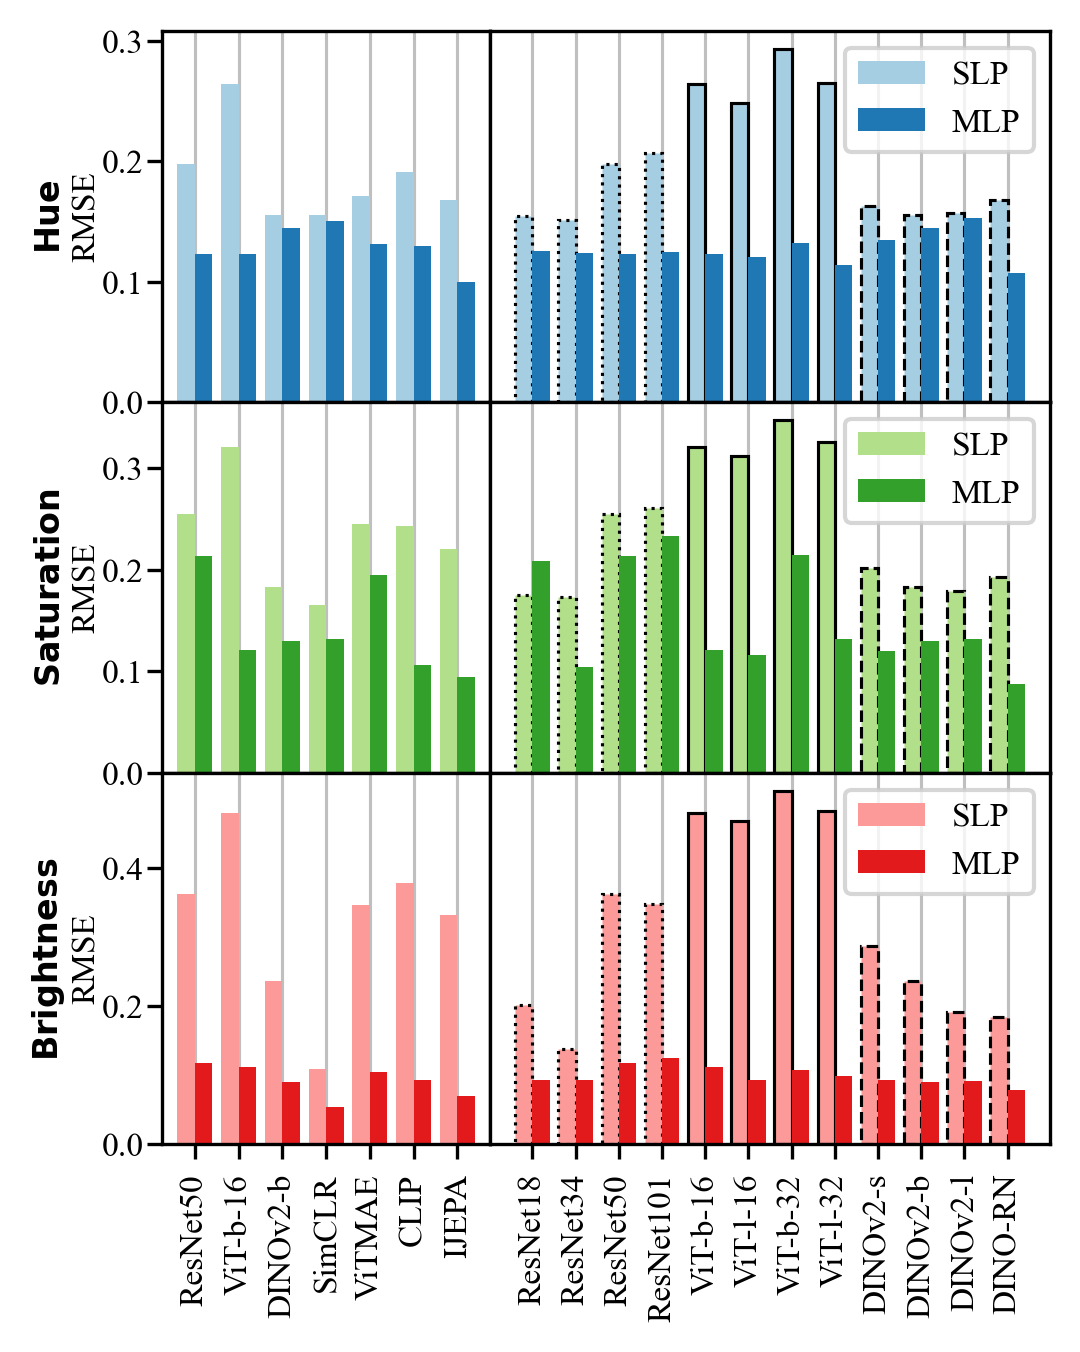

In [ ]:
# SUPER COMBINED PLOT

import matplotlib.gridspec as gridspec  # Import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.text import Text

# Combined Plot
# Mark each probe type
df_info_linear["Type"] = "SLP"
df_info_nonlinear["Type"] = "MLP"
df_info_combined = pd.concat([df_info_linear, df_info_nonlinear])

# Define only the features (models) to plot - both sets
features_to_plot_1 = [
    "ResNet50_ImageNet",
    "ViT_b_16_ImageNet",
    "DINOv2_base",
    "SimCLR",
    "ViT_MAE",
    "CLIP",
    "IJEPA",
]
features_to_plot_2 = [
    "ResNet18_ImageNet",
    "ResNet34_ImageNet",
    "ResNet50_ImageNet",
    "ResNet101_ImageNet",
    "ViT_b_16_ImageNet",
    "ViT_l_16_ImageNet",
    "ViT_b_32_ImageNet",
    "ViT_l_32_ImageNet",
    "DINOv2_small",
    "DINOv2_base",
    "DINOv2_large",
    "DINO_RN",
]

# Force the order: hue, saturation, brightness (to be mapped to value)
desired_order = ["hue", "saturation", "brightness"]
# Ensure only labels present in the data are used, preserving the desired order:
info_labels = [
    lbl for lbl in desired_order if lbl in df_info_combined["Label"].unique()
]


# Define line styles for each feature category
edge_dict = {
    "ResNet": "dotted",
    "ViT": "solid",
    "DINO": "dashed",
}
edge_width = 0.75  # adjust as needed

cmap = plt.get_cmap("Paired")

# Create the figure and the grid
fig = plt.figure(figsize=(10 * 2.6 / 7.14, 3.5 * 1.3))  # Adjust figure size as needed
gs = gridspec.GridSpec(3, 2, width_ratios=[7, 12])
gs.update(wspace=0.0, hspace=0.0)


# Function to create a bar plot (DRY principle)
def create_bar_plot(
    ax,
    df,
    label,
    features_to_plot,
    cmap_index,
    edge_dict=None,
    edge_width=0.7,
    show_legend=False,  # Add a show_legend parameter
):
    df_label = df[df["Label"] == label]
    pivot = df_label.pivot(index="Feature", columns="Type", values="MSE")
    pivot = pivot.reindex(features_to_plot)
    x = np.arange(len(pivot.index))
    bar_width = 0.4

    display_features = [
        feat.replace("_ImageNet", "")
        .replace("small", "s")
        .replace("base", "b")
        .replace("large", "l")
        .replace("ViT_MAE", "ViTMAE")
        .replace("_", "-")
        for feat in pivot.index
    ]

    color_slp = cmap(cmap_index * 2)
    color_mlp = cmap(cmap_index * 2 + 1)

    ax.bar(
        x - bar_width / 2, pivot["SLP"], width=bar_width, color=color_slp, label="SLP"
    )
    ax.bar(
        x + bar_width / 2, pivot["MLP"], width=bar_width, color=color_mlp, label="MLP"
    )

    # Set edge style for each bar based on its feature name
    if edge_dict:
        for idx, rect in enumerate(ax.patches[: len(pivot)]):
            feature = pivot.index[idx]
            for prefix, linestyle in edge_dict.items():
                if feature.startswith(prefix):
                    rect.set_edgecolor("black")
                    rect.set_linestyle(linestyle)
                    rect.set_linewidth(edge_width)
                    break

    ax.set_xticks(x)
    ax.set_xticklabels(display_features, rotation=90)
    # Replace the set_ylabel line with:
    ax.set_ylabel(f"$\\mathbf{{{label.capitalize()}}}$\nRMSE", labelpad=0)

    if show_legend:  # Only show legend if show_legend is True
        leg = ax.legend()
        for handle in leg.get_patches():
            handle.set_edgecolor("none")

    # Add vertical grid lines across the x-axis
    ax.set_axisbelow(True)
    ax.grid(True, axis="x", linestyle="solid", color="gray", alpha=0.5, linewidth=0.75)
    # ax.grid(True, axis="y", linestyle="--", color="gray", alpha=0.5)


# For each row, create the first axis and then share its y-axis in the second axis
for i, label in enumerate(info_labels):
    ax1 = plt.Subplot(fig, gs[i, 0])  # Main features plot in the first column
    fig.add_subplot(ax1)
    create_bar_plot(
        ax1, df_info_combined, label, features_to_plot_1, i
    )  # show_legend defaults to False
    # Hide x-axis labels if not bottom row
    if i < len(info_labels) - 1:
        ax1.set_xticklabels([])
    ax1.tick_params(axis="y", which="both", pad=1)

    ax2 = plt.Subplot(
        fig, gs[i, 1], sharey=ax1
    )  # Ablation features plot in the second column
    fig.add_subplot(ax2)
    create_bar_plot(
        ax2,
        df_info_combined,
        label,
        features_to_plot_2,
        i,
        edge_dict,
        edge_width,
        show_legend=True,  # Pass show_legend=True for the right column
    )
    # Always hide y ticks on the second column
    ax2.tick_params(axis="y", which="both", length=0)
    ax2.tick_params(labelleft=False)
    ax2.set_ylabel("")
    # Hide x-axis labels if not bottom row
    if i < len(info_labels) - 1:
        ax2.set_xticklabels([])


# plt.subplots_adjust(wspace=0.0, hspace=0.0)  # Already done via gs.update() above.  Redundant and unnecessary.
plt.tight_layout()
plt.show()

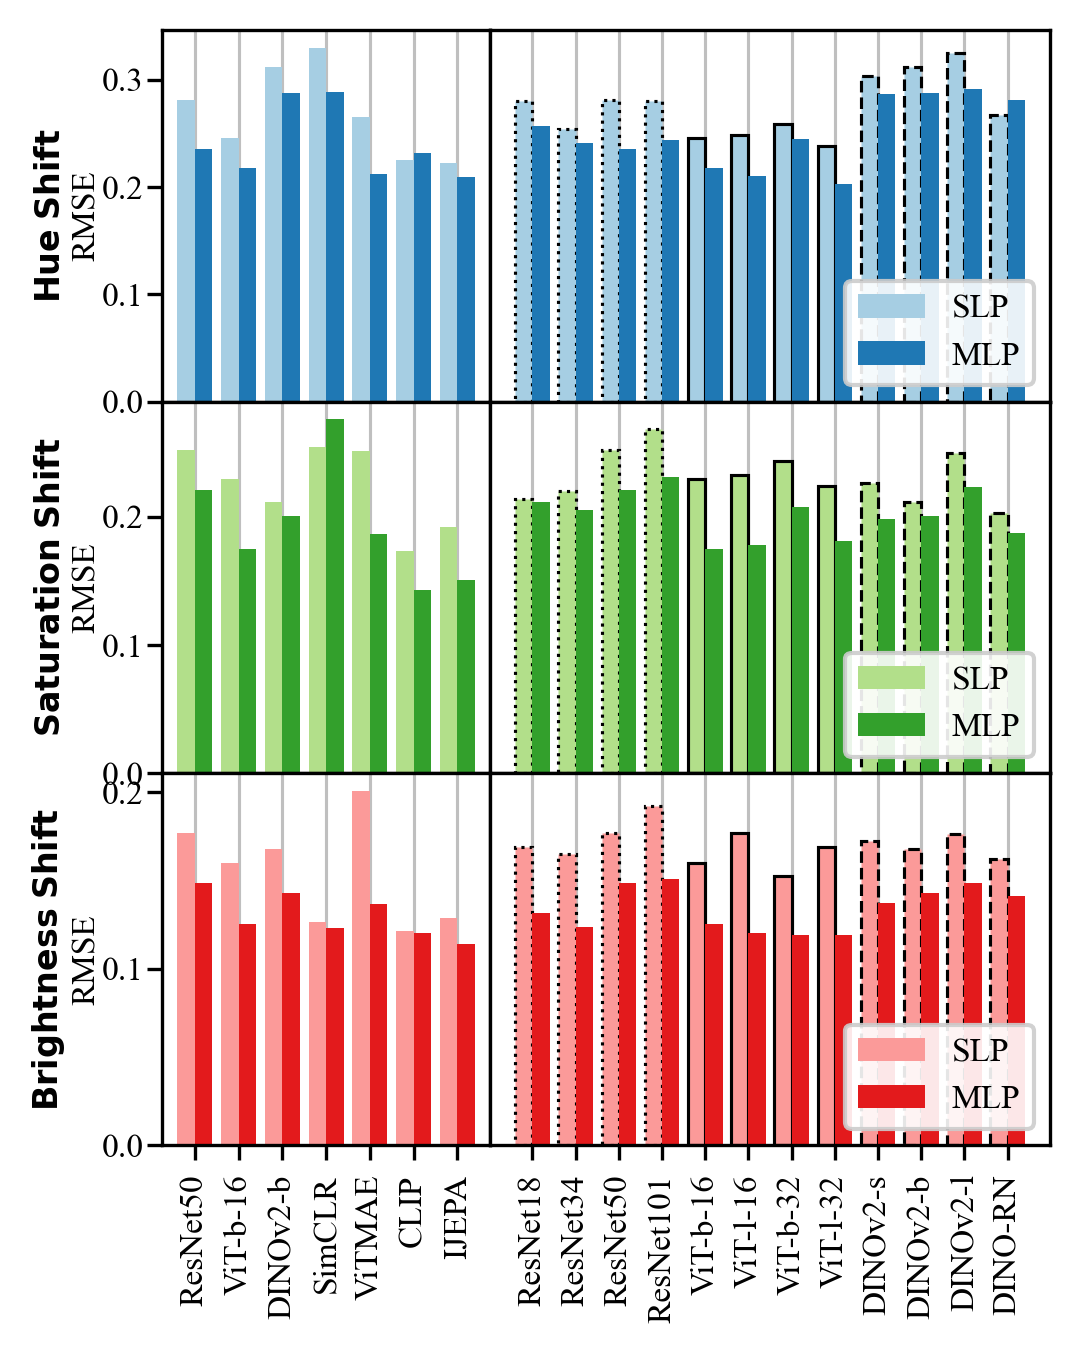

In [ ]:
# SUPER COMBINED PLOT

import matplotlib.gridspec as gridspec  # Import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.text import Text

# Combined Plot
# Mark each probe type
df_para_linear["Type"] = "SLP"
df_para_nonlinear["Type"] = "MLP"
df_para_combined = pd.concat([df_para_linear, df_para_nonlinear])
para_transforms = ["HueShift", "SaturationShift", "BrightnessShift"]

# Define only the features (models) to plot - both sets
features_to_plot_1 = [
    "ResNet50_ImageNet",
    "ViT_b_16_ImageNet",
    "DINOv2_base",
    "SimCLR",
    "ViT_MAE",
    "CLIP",
    "IJEPA",
]
features_to_plot_2 = [
    "ResNet18_ImageNet",
    "ResNet34_ImageNet",
    "ResNet50_ImageNet",
    "ResNet101_ImageNet",
    "ViT_b_16_ImageNet",
    "ViT_l_16_ImageNet",
    "ViT_b_32_ImageNet",
    "ViT_l_32_ImageNet",
    "DINOv2_small",
    "DINOv2_base",
    "DINOv2_large",
    "DINO_RN",
]

# Force the order: hue, saturation, brightness (to be mapped to value)
desired_order = ["HueShift", "SaturationShift", "BrightnessShift"]
# Ensure only labels present in the data are used, preserving the desired order:
info_labels = [
    lbl for lbl in desired_order if lbl in df_para_combined["Transform"].unique()
]


# Define line styles for each feature category
edge_dict = {
    "ResNet": "dotted",
    "ViT": "solid",
    "DINO": "dashed",
}
edge_width = 0.75  # adjust as needed

cmap = plt.get_cmap("Paired")

# Create the figure and the grid
fig = plt.figure(figsize=(10 * 2.6 / 7.14, 3.5 * 1.3))  # Adjust figure size as needed
gs = gridspec.GridSpec(3, 2, width_ratios=[7, 12])
gs.update(wspace=0.0, hspace=0.0)


# Function to create a bar plot (DRY principle)
def create_bar_plot(
    ax,
    df,
    transform,
    features_to_plot,
    cmap_index,
    edge_dict=None,
    edge_width=0.7,
    show_legend=False,  # Add a show_legend parameter
):
    df_transform = df[df["Transform"] == transform]
    pivot = df_transform.pivot(index="Feature", columns="Type", values="MSE")
    pivot = pivot.reindex(features_to_plot)
    x = np.arange(len(pivot.index))
    bar_width = 0.4

    display_features = [
        feat.replace("_ImageNet", "")
        .replace("small", "s")
        .replace("base", "b")
        .replace("large", "l")
        .replace("ViT_MAE", "ViTMAE")
        .replace("_", "-")
        for feat in pivot.index
    ]

    color_slp = cmap(cmap_index * 2)
    color_mlp = cmap(cmap_index * 2 + 1)

    ax.bar(
        x - bar_width / 2, pivot["SLP"], width=bar_width, color=color_slp, label="SLP"
    )
    ax.bar(
        x + bar_width / 2, pivot["MLP"], width=bar_width, color=color_mlp, label="MLP"
    )

    # Set edge style for each bar based on its feature name
    if edge_dict:
        for idx, rect in enumerate(ax.patches[: len(pivot)]):
            feature = pivot.index[idx]
            for prefix, linestyle in edge_dict.items():
                if feature.startswith(prefix):
                    rect.set_edgecolor("black")
                    rect.set_linestyle(linestyle)
                    rect.set_linewidth(edge_width)
                    break

    ax.set_xticks(x)
    ax.set_xticklabels(display_features, rotation=90)
    # Replace the set_ylabel line with:
    formatted_transform = transform.replace("Shift", r"\;Shift")
    ax.set_ylabel(f"$\\mathbf{{{formatted_transform}}}$\nRMSE", labelpad=0)

    # Set y-axis ticks with increment of 0.1
    ymin, ymax = ax.get_ylim()
    yticks = np.arange(0, ymax, 0.1)  # Creates ticks from 0 to ymax in steps of 0.1
    ax.set_yticks(yticks)

    if show_legend:  # Only show legend if show_legend is True
        leg = ax.legend(loc="lower right", framealpha=0.9)
        for handle in leg.get_patches():
            handle.set_edgecolor("none")

    # Add vertical grid lines across the x-axis
    ax.set_axisbelow(True)
    ax.grid(True, axis="x", linestyle="solid", color="gray", alpha=0.5, linewidth=0.75)
    # ax.grid(True, axis="y", linestyle="--", color="gray", alpha=0.5)


# For each row, create the first axis and then share its y-axis in the second axis
for i, transform in enumerate(para_transforms):
    ax1 = plt.Subplot(fig, gs[i, 0])  # Main features plot in the first column
    fig.add_subplot(ax1)
    create_bar_plot(
        ax1, df_para_combined, transform, features_to_plot_1, i
    )  # show_legend defaults to False
    # Hide x-axis labels if not bottom row
    if i < len(para_transforms) - 1:
        ax1.set_xticklabels([])
    ax1.tick_params(axis="y", which="both", pad=1)

    ax2 = plt.Subplot(
        fig, gs[i, 1], sharey=ax1
    )  # Ablation features plot in the second column
    fig.add_subplot(ax2)
    create_bar_plot(
        ax2,
        df_para_combined,
        transform,
        features_to_plot_2,
        i,
        edge_dict,
        edge_width,
        show_legend=True,  # Pass show_legend=True for the right column
    )
    # Always hide y ticks on the second column
    ax2.tick_params(axis="y", which="both", length=0)
    ax2.tick_params(labelleft=False)
    ax2.set_ylabel("")
    # Hide x-axis labels if not bottom row
    if i < len(para_transforms) - 1:
        ax2.set_xticklabels([])


# plt.subplots_adjust(wspace=0.0, hspace=0.0)  # Already done via gs.update() above.  Redundant and unnecessary.
plt.tight_layout()
plt.show()

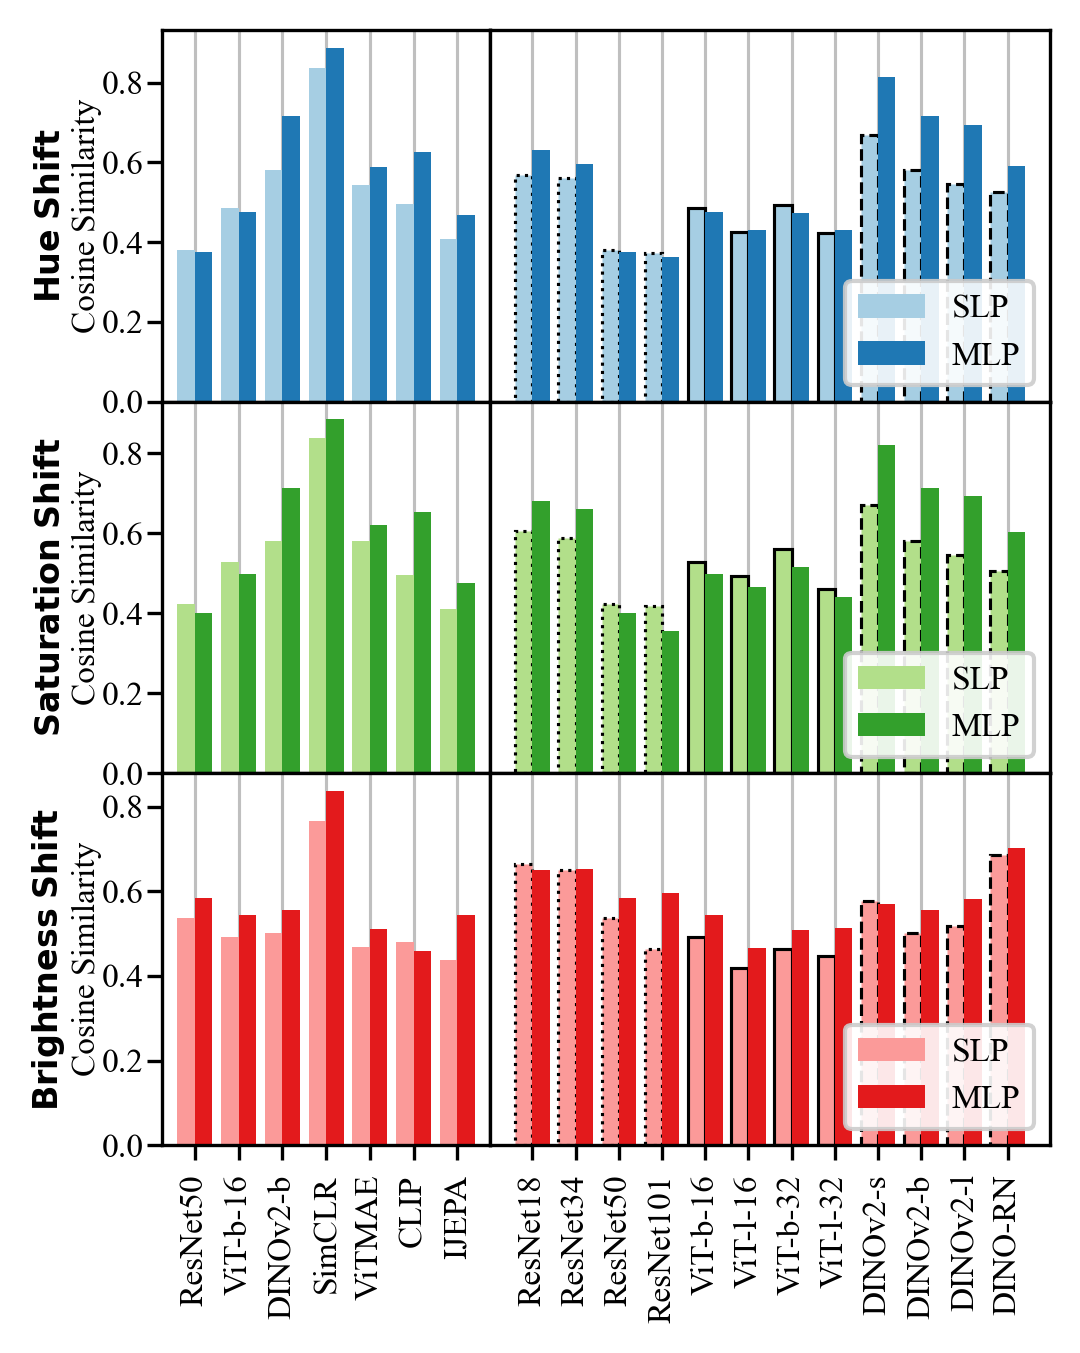

In [72]:
# SUPER COMBINED PLOT for EQUI_FEAT (Cosine Similarity)

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.text import Text

# Combined Plot
# Mark each probe type
df_feat_cosine_linear["Type"] = "SLP"
df_feat_cosine_nonlinear["Type"] = "MLP"
df_feat_cosine_combined = pd.concat([df_feat_cosine_linear, df_feat_cosine_nonlinear])
cosine_transforms = ["HueShift", "SaturationShift", "BrightnessShift"]

# Define only the features (models) to plot - both sets
features_to_plot_1 = [
    "ResNet50_ImageNet",
    "ViT_b_16_ImageNet",
    "DINOv2_base",
    "SimCLR",
    "ViT_MAE",
    "CLIP",
    "IJEPA",
]
features_to_plot_2 = [
    "ResNet18_ImageNet",
    "ResNet34_ImageNet",
    "ResNet50_ImageNet",
    "ResNet101_ImageNet",
    "ViT_b_16_ImageNet",
    "ViT_l_16_ImageNet",
    "ViT_b_32_ImageNet",
    "ViT_l_32_ImageNet",
    "DINOv2_small",
    "DINOv2_base",
    "DINOv2_large",
    "DINO_RN",
]

# Force the order: hue, saturation, brightness
desired_order = ["HueShift", "SaturationShift", "BrightnessShift"]
# Ensure only labels present in the data are used, preserving the desired order:
info_labels = [
    lbl for lbl in desired_order if lbl in df_feat_cosine_combined["Transform"].unique()
]

# Define line styles for each feature category
edge_dict = {
    "ResNet": "dotted",
    "ViT": "solid",
    "DINO": "dashed",
}
edge_width = 0.75  # adjust as needed

cmap = plt.get_cmap("Paired")

# Create the figure and the grid
fig = plt.figure(figsize=(10 * 2.6 / 7.14, 3.5 * 1.3))  # Adjust figure size as needed
gs = gridspec.GridSpec(3, 2, width_ratios=[7, 12])
gs.update(wspace=0.0, hspace=0.0)


# Function to create a bar plot (DRY principle)
def create_bar_plot(
    ax,
    df,
    transform,
    features_to_plot,
    cmap_index,
    edge_dict=None,
    edge_width=0.7,
    show_legend=False,
):
    df_transform = df[df["Transform"] == transform]
    pivot = df_transform.pivot_table(
        index="Feature", columns="Type", values="Cosine", aggfunc="mean"
    )
    pivot = pivot.reindex(features_to_plot)
    x = np.arange(len(pivot.index))
    bar_width = 0.4

    display_features = [
        feat.replace("_ImageNet", "")
        .replace("small", "s")
        .replace("base", "b")
        .replace("large", "l")
        .replace("ViT_MAE", "ViTMAE")
        .replace("_", "-")
        for feat in pivot.index
    ]

    color_slp = cmap(cmap_index * 2)
    color_mlp = cmap(cmap_index * 2 + 1)

    ax.bar(
        x - bar_width / 2, pivot["SLP"], width=bar_width, color=color_slp, label="SLP"
    )
    ax.bar(
        x + bar_width / 2, pivot["MLP"], width=bar_width, color=color_mlp, label="MLP"
    )

    # Set edge style for each bar based on its feature name
    if edge_dict:
        for idx, rect in enumerate(ax.patches[: len(pivot)]):
            feature = pivot.index[idx]
            for prefix, linestyle in edge_dict.items():
                if feature.startswith(prefix):
                    rect.set_edgecolor("black")
                    rect.set_linestyle(linestyle)
                    rect.set_linewidth(edge_width)
                    break

    ax.set_xticks(x)
    ax.set_xticklabels(display_features, rotation=90)

    formatted_transform = transform.replace("Shift", r"\;Shift")
    ax.set_ylabel(f"$\\mathbf{{{formatted_transform}}}$\nCosine Similarity", labelpad=0)

    # Set y-axis ticks with increment of 0.1 (adjust as needed for cosine similarity)
    ymin, ymax = ax.get_ylim()
    yticks = np.arange(
        ymin, ymax, 0.2
    )  # Creates ticks from ymin to ymax in steps of 0.1
    ax.set_yticks(yticks)

    if show_legend:  # Only show legend if show_legend is True
        leg = ax.legend(loc="lower right", framealpha=0.9)
        for handle in leg.get_patches():
            handle.set_edgecolor("none")

    # Add vertical grid lines across the x-axis
    ax.set_axisbelow(True)
    ax.grid(True, axis="x", linestyle="solid", color="gray", alpha=0.5, linewidth=0.75)


# For each row, create the first axis and then share its y-axis in the second axis
for i, transform in enumerate(cosine_transforms):
    ax1 = plt.Subplot(fig, gs[i, 0])  # Main features plot in the first column
    fig.add_subplot(ax1)
    create_bar_plot(
        ax1, df_feat_cosine_combined, transform, features_to_plot_1, i
    )  # show_legend defaults to False
    # Hide x-axis labels if not bottom row
    if i < len(cosine_transforms) - 1:
        ax1.set_xticklabels([])
    ax1.tick_params(axis="y", which="both", pad=1)

    ax2 = plt.Subplot(
        fig, gs[i, 1], sharey=ax1
    )  # Ablation features plot in the second column
    fig.add_subplot(ax2)
    create_bar_plot(
        ax2,
        df_feat_cosine_combined,
        transform,
        features_to_plot_2,
        i,
        edge_dict,
        edge_width,
        show_legend=True,  # Pass show_legend=True for the right column
    )
    # Always hide y ticks on the second column
    ax2.tick_params(axis="y", which="both", length=0)
    ax2.tick_params(labelleft=False)
    ax2.set_ylabel("")
    # Hide x-axis labels if not bottom row
    if i < len(cosine_transforms) - 1:
        ax2.set_xticklabels([])


plt.tight_layout()
plt.show()